## DSC 680 Applied Data Science (T301-2237-1)
## Bellevue University
## Professor Williams
## Author: Jake Meyer
## Date: 07/18/2023
## Project 2 - World Happiness Model

## 1) Business Case

Since 2012, the Sustainable Development Solutions Network has been publishing the World Happiness Report every year around March 20 in recognition of the International Day of Happiness. The World Happiness Report, “reflects a worldwide demand for more attention to happiness and well-being criteria for government policy” (2023). A thorough understanding of happiness around the globe is important for several reasons. First, the underlying factors for the happiest or unhappiest countries can be compared. Leaders within each country can review their current policies to understand areas to improve for a happier country. Second, major events such as wars or pandemics may have a significant impact on mental health. Leaders within countries with sharp declines in happiness for their citizens can act when needed. Third, many scientific studies indicate great benefits for individuals that tend to be happier compared to peers. Some of these benefits include improved heart health, handling stress more effectively, better immune systems, pain reduction, healthy lifestyles, and increased life expectancy (Mead, 2019). Although the focus for this project will consider happiness by country, it is also important to recognize the benefits of happiness on an individual level. The primary objective for this project is to create a regression model to predict the happiness level of countries. The research questions related to this analysis are shown below:

<ul>
    <li> Which countries are the happiest?
    <li> Which countries are the unhappiest?
    <li> Which features are most significant for the happiest countries?
    <li> Which model provides the best accuracy for predicting a country’s happiness level?
<ul>

### Dataset Source

The raw datasets were pulled from the World Happiness Report supporting files shown in the link below: <br>
[World Happiness Report Data](https://worldhappiness.report/archive/) <br>
There is a section for supporting data under each report that was pulled from 2015-2023 and consolidated into one single file.

### Import Necessary Libraries

In [1]:
'''
Import the necessary libraries for the analysis.
'''
import csv
import numpy as np
import pandas as pd
import operator
from collections import OrderedDict
from pathlib import Path
import pickle

## matplotlib and seaborn imports
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

## scipy imports
import scipy.stats
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import pointbiserialr

## sklearn imports
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3
sklearn: 0.24.2


## 2) Data Understanding

Start by overviewing the data set, univariate analysis, and multivariate analysis.

### Data Set Overview

In [3]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
Use head() function to display the first 10 rows of data of df.
'''
df = pd.read_excel('WHR_Overall1.xlsx', sheet_name = 0)
df.head(10)

Key  Year  Rank Country name  Ladder score 1  \
0      Finland2023  2023     1      Finland          7.8042   
1      Denmark2023  2023     2      Denmark          7.5864   
2      Iceland2023  2023     3      Iceland          7.5296   
3       Israel2023  2023     4       Israel          7.4729   
4  Netherlands2023  2023     5  Netherlands          7.4030   
5       Sweden2023  2023     6       Sweden          7.3952   
6       Norway2023  2023     7       Norway          7.3155   
7  Switzerland2023  2023     8  Switzerland          7.2401   
8   Luxembourg2023  2023     9   Luxembourg          7.2279   
9  New Zealand2023  2023    10  New Zealand          7.1229   

   Ladder score 2 (2023 Table 2.1 Data)   Standard error of ladder score  \
0                                    NaN                        0.036162   
1                                    NaN                        0.041028   
2                                    NaN                        0.048612   
3                                    NaN                        0.031609   
4                                    NaN                        0.029294   
5                                    NaN                        0.037362   
6                                    NaN                        0.044143   
7                                    NaN                        0.042789   
8                                    NaN                        0.069081   
9                                    NaN                        0.038227   

   upperwhisker  lowerwhisker  Logged GDP per capita  ...  Generosity  \
0      7.875078      7.733322              10.792010  ...   -0.018824   
1      7.666815      7.505985              10.962164  ...    0.134242   
2      7.624879      7.434321              10.895531  ...    0.210987   
3      7.534853      7.410946              10.638705  ...   -0.023080   
4      7.460416      7.345583              10.942279  ...    0.212686   
5      7.468428      7.321971              10.882823  ...    0.164789   
6      7.402020      7.228980              11.087730  ...    0.140636   
7      7.323966      7.156234              11.164027  ...    0.026686   
8      7.363298      7.092502              11.659949  ...    0.023950   
9      7.197824      7.047976              10.661865  ...    0.174828   

   Perceptions of corruption  Ladder score in Dystopia  \
0                   0.181745                  1.777825   
1                   0.195814                  1.777825   
2                   0.667848                  1.777825   
3                   0.708094                  1.777825   
4                   0.378929                  1.777825   
5                   0.202448                  1.777825   
6                   0.282745                  1.777825   
7                   0.266348                  1.777825   
8                   0.344978                  1.777825   
9                   0.271205                  1.777825   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                          1.888380                      1.584900   
1                          1.949406                      1.547875   
2                          1.925508                      1.619666   
3                          1.833398                      1.520674   
4                          1.942274                      1.488228   
5                          1.920950                      1.510329   
6                          1.994440                      1.521009   
7                          2.021803                      1.462816   
8                          2.199664                      1.356879   
9                          1.841704                      1.543546   

   Explained by: Healthy life expectancy  \
0                               0.534574   
1                               0.537302   
2                               0.559096   
3                               0.576730   
4                               0.545473   
5                

In [4]:
'''
Understand the shape of the dataset.
Display the total size of this dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))
print('This dataset contains {} records.'.format(df.size))

There are 1367 rows and 23 columns in this dataset.
This dataset contains 31441 records.


In [5]:
'''
Find the type of data within each column initially.
'''
df.dtypes

Key                                            object
Year                                            int64
Rank                                            int64
Country name                                   object
Ladder score 1                                float64
Ladder score 2 (2023 Table 2.1 Data)          float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life e

In [6]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

Standard error of ladder score                614
Ladder score 2 (2023 Table 2.1 Data)          342
upperwhisker                                  158
lowerwhisker                                  158
Perceptions of corruption                      98
Healthy life expectancy                        94
Logged GDP per capita                          94
Freedom to make life choices                   91
Generosity                                     91
Social support                                 91
Explained by: Healthy life expectancy           1
Dystopia + residual                             1
Year                                            0
Ladder score 1                                  0
Country name                                    0
Ladder score in Dystopia                        0
Explained by: Log GDP per capita                0
Explained by: Social support                    0
Rank                                            0
Explained by: Freedom to make life choices      0


In [7]:
'''
Understand how many missing values are in the dataset initially.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values.'.format(missing_values))

This dataset contains 1833 total missing values.


In [8]:
'''
Reduce the columns that have no data or will not be relevant for the happiness model.
'''
drop_list = ['Standard error of ladder score', 'Ladder score 2 (2023 Table 2.1 Data) ', 'upperwhisker', 'lowerwhisker', 'Key']
df.drop(drop_list, axis = 1, inplace = True)

In [9]:
print("These are the {} columns that were removed initially from the data set:".format(len(drop_list)))
print(*drop_list, sep = ", ")

These are the 5 columns that were removed initially from the data set:
Standard error of ladder score, Ladder score 2 (2023 Table 2.1 Data) , upperwhisker, lowerwhisker, Key


In [10]:
'''
Understand how many missing values are in the dataset after removing irrelevant columns.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values after features have been removed.'.format(missing_values))

This dataset contains 561 total missing values after features have been removed.


Removed all the \* values from the country names in the consolidated data set.

In [11]:
'''
Create a dictionary for median corrpution scores by country to use for null value handling.
'''
corruption_median_dict = df['Perceptions of corruption'].groupby(df['Country name']).median().to_dict()
# corruption_median_dict

In [12]:
'''
Create a dictionary for median healthy life expectancy scores by country to use for null value handling.
'''
life_median_dict = df['Healthy life expectancy'].groupby(df['Country name']).median().to_dict()
# life_median_dict

In [13]:
'''
Create a dictionary for median GDP per capita scores by country to use for null value handling.
'''
gdp_median_dict = df['Logged GDP per capita'].groupby(df['Country name']).median().to_dict()
# gdp_median_dict

In [14]:
'''
Create a dictionary for median freedom of life choice scores by country to use for null value handling.
'''
freedom_median_dict = df['Freedom to make life choices'].groupby(df['Country name']).median().to_dict()
# freedom_median_dict

In [15]:
'''
Create a dictionary for median generosity scores by country to use for null value handling.
'''
generosity_median_dict = df['Generosity'].groupby(df['Country name']).median().to_dict()
# generosity_median_dict

In [16]:
'''
Create a dictionary for median generosity scores by country to use for null value handling.
'''
social_median_dict = df['Social support'].groupby(df['Country name']).median().to_dict()
# social_median_dict

In [17]:
'''
Create a dictionary for median explained by: Healthy life expectancy scores by country to use for null value handling.
'''
hle_explained_median_dict = df['Explained by: Healthy life expectancy'].groupby(df['Country name']).median().to_dict()
# hle_explained_median_dict

In [18]:
'''
Create a dictionary for median Dystopia + residual scores by country to use for null value handling.
'''
dystopia_median_dict = df['Dystopia + residual'].groupby(df['Country name']).median().to_dict()
# dystopia_median_dict

In [19]:
'''
Replace the missing values with the respective dictionary values created above.
'''
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(df['Country name'].map(corruption_median_dict))
df['Healthy life expectancy'] = df['Healthy life expectancy'].fillna(df['Country name'].map(life_median_dict))
df['Logged GDP per capita'] = df['Logged GDP per capita'].fillna(df['Country name'].map(gdp_median_dict))
df['Freedom to make life choices'] = df['Freedom to make life choices'].fillna(df['Country name'].map(freedom_median_dict))
df['Generosity'] = df['Generosity'].fillna(df['Country name'].map(generosity_median_dict))
df['Social support'] = df['Social support'].fillna(df['Country name'].map(social_median_dict))
df['Explained by: Healthy life expectancy'] = df['Explained by: Healthy life expectancy'].fillna(df['Country name'].map(hle_explained_median_dict))
df['Dystopia + residual'] = df['Dystopia + residual'].fillna(df['Country name'].map(dystopia_median_dict))

In [20]:
'''
Understand how many missing values are in the dataset initially after replacing missing values.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values.'.format(missing_values))

This dataset contains 23 total missing values.


In [21]:
'''
Show the missing values in a revised data frame.
'''
df_na = df[df.isna().any(axis = 1)]
df_na

Year  Rank          Country name  Ladder score 1  Logged GDP per capita  \
98    2023    99    State of Palestine          4.9078               8.716377   
235   2022    99                 Congo          5.0752                    NaN   
261   2022   125  Eswatini, Kingdom of          4.3961                    NaN   
798   2018    58       Northern Cyprus          5.8348                    NaN   
1066  2016    15           Puerto Rico          7.0390                    NaN   

      Social support  Healthy life expectancy  Freedom to make life choices  \
98          0.859495                      NaN                      0.694500   
235              NaN                      NaN                           NaN   
261              NaN                      NaN                           NaN   
798         0.800413                      NaN                      0.790459   
1066             NaN                      NaN                           NaN   

      Generosity  Perceptions of corruption  Ladder score in Dystopia  \
98      -0.13237                   0.835795                  1.777825   
235          NaN                        NaN                  1.830000   
261          NaN                        NaN                  1.830000   
798      0.38176                   0.663229                  1.920000   
1066         NaN                        NaN                  2.330000   

      Explained by: Log GDP per capita  Explained by: Social support  \
98                            1.143960                      1.308868   
235                           0.950383                      0.405160   
261                           1.273627                      0.786265   
798                           1.228816                      1.211011   
1066                          1.359431                      1.081130   

      Explained by: Healthy life expectancy  \
98                                      NaN   
235                                0.355222   
261                                0.196882   
798                                0.909132   
1066                               0.777580   

      Explained by: Freedom to make life choices  Explained by: Generosity  \
98                                      0.416328                  0.065409   
235                                     0.430860                  0.130043   
261                                     0.259250                  0.037638   
798                                     0.494897                  0.178681   
1066                                    0.468232                  0.222022   

      Explained by: Perceptions of corruption  Dystopia + residual  
98                                   0.066824                  NaN  
235                                  0.145644             2.657927  
261                                  0.154094             1.688359  
798                                  0.153539             1.658751  
1066                                 0.122753             3.007603

There are five rows for State of Palestine, Congo, Kingdom of Eswatini, Northern Cyprus, and Puerto Rico with multiple missing values across the features. These will be removed since the median values were unable to be calculated since there were no recorded values. 

In [22]:
'''
Drop existing rows with missing values.
'''
df = df.dropna()

In [23]:
'''
Understand the shape of the revised data set.
Display the total size of this data set.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))
print('This dataset contains {} records.'.format(df.size))

There are 1362 rows and 18 columns in this dataset.
This dataset contains 24516 records.


In [24]:
'''
Understand how many missing values are in the dataset initially after replacing missing values.
Check that it is 0.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values.'.format(missing_values))

This dataset contains 0 total missing values.


In [25]:
''' 
Rename the columns for the remainder of the analysis.
'''
column_names = ['year', 'rank', 'country_name', 'happiness_score', 'gdp_per_capita',
               'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 
               'corruption_perception', 'dystopia_score', 'explained_gdp', 'explained_social_support',
               'explained_life_expectancy', 'explained_freedom', 'explained_generosity', 'explained_corruption',
               'dytopia_and_residual']

df.columns = column_names
df.head()

year  rank country_name  happiness_score  gdp_per_capita  social_support  \
0  2023     1      Finland           7.8042       10.792010        0.968770   
1  2023     2      Denmark           7.5864       10.962164        0.954112   
2  2023     3      Iceland           7.5296       10.895531        0.982533   
3  2023     4       Israel           7.4729       10.638705        0.943344   
4  2023     5  Netherlands           7.4030       10.942279        0.930499   

   life_expectancy  freedom_choices  generosity  corruption_perception  \
0        71.149994         0.961408   -0.018824               0.181745   
1        71.250145         0.933533    0.134242               0.195814   
2        72.050018         0.936349    0.210987               0.667848   
3        72.697205         0.808866   -0.023080               0.708094   
4        71.550018         0.886875    0.212686               0.378929   

   dystopia_score  explained_gdp  explained_social_support  \
0        1.777825       1.888380                  1.584900   
1        1.777825       1.949406                  1.547875   
2        1.777825       1.925508                  1.619666   
3        1.777825       1.833398                  1.520674   
4        1.777825       1.942274                  1.488228   

   explained_life_expectancy  explained_freedom  explained_generosity  \
0                   0.534574           0.771510              0.126331   
1                   0.537302           0.734416              0.208459   
2                   0.559096           0.738164              0.249635   
3                   0.576730           0.568518              0.124048   
4                   0.545473           0.672327              0.250547   

   explained_corruption  dytopia_and_residual  
0              0.535299              2.363241  
1              0.525221              2.083766  
2              0.187119              2.250382  
3              0.158292              2.691290  
4              0.394062              2.110044

In [26]:
'''
Further understand unique values within the features.
'''
df['country_name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Canada', 'Ireland', 'United States', 'Germany',
       'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France',
       'Slovenia', 'Costa Rica', 'Romania', 'Singapore',
       'United Arab Emirates', 'Taiwan Province of China', 'Uruguay',
       'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo',
       'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua',
       'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus',
       'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary',
       'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal',
       'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia',
       'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay',
       'Montenegro', 'Jamaica', 'Bolivia', 'Russia',
       'Bosnia and Herzegovina', 'Colombia', 'Domin

In [27]:
'''
Further understand unique values within the features.
'''
print("Number of unique countries: {}".format(len(df['country_name'].unique())))

Number of unique countries: 170


In [28]:
'''
Further understand unique values within the features.
'''
df['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015], dtype=int64)

In [29]:
'''
Further understand unique values within the features.
'''
print("Number of Years: {}".format(len(df['year'].unique())))

Number of Years: 9


### Highlights for Data Set Overview: 
<ul>
    <li> World Health Report data from 2015-2023 (9 years) was consolidated into one Excel file.
    <li> There were 1367 rows and 23 columns in the overall data set initially. (contained 31441 records)
    <li> There were 1833 missing values in the data set initially.
    <li> Removed 5 columns from the data set: Standard error of ladder score, Ladder score 2 (2023 Table 2.1 Data) , upperwhisker, lowerwhisker, Key. These columns were irrelevent for happiness prediction or were utilized only for consolidating the data.
    <li> The median feature values for each country were utilized to fill the missing values in the data.
    <li> There are 170 unique countries included in the data.
<ul>

### Univariate Analysis

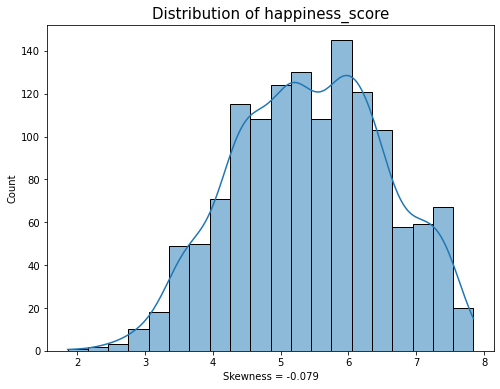

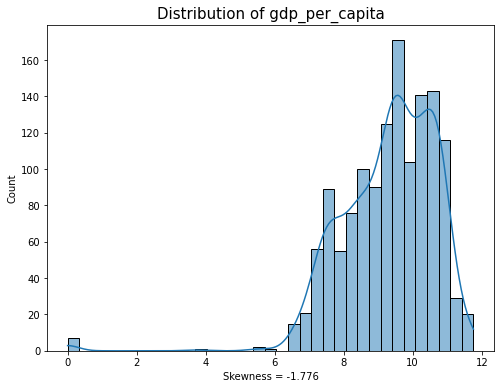

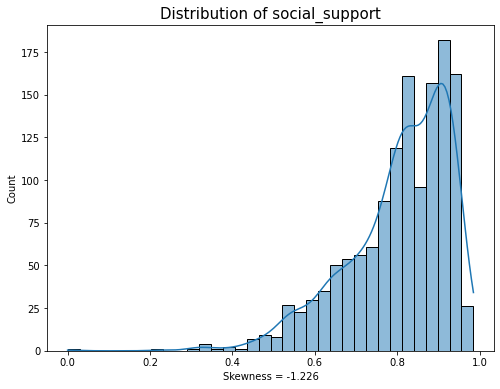

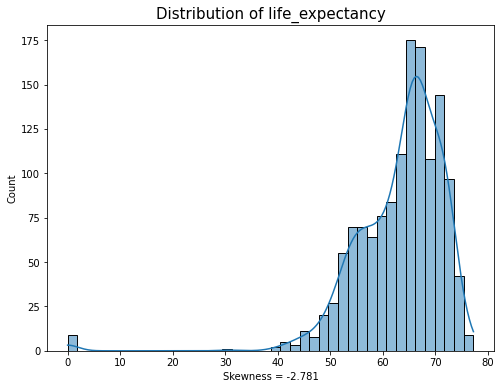

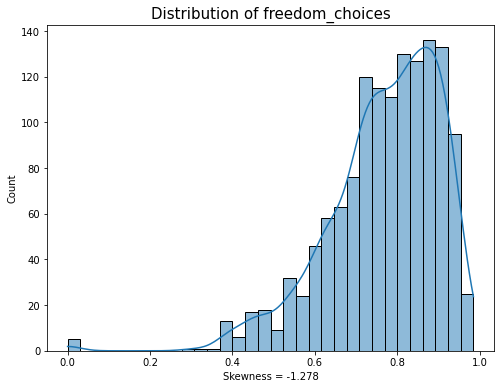

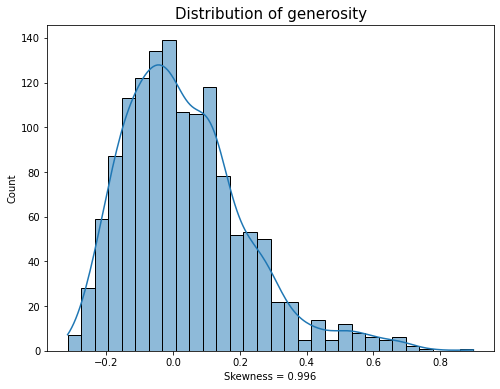

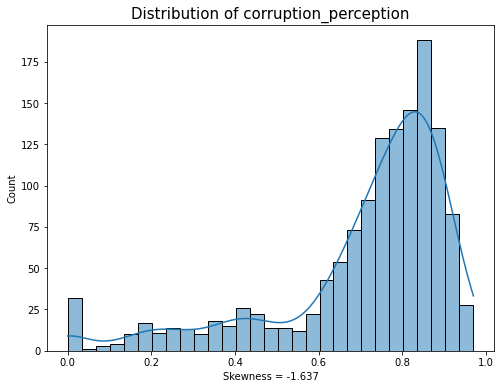

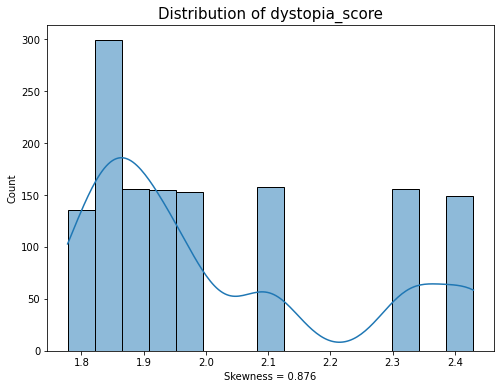

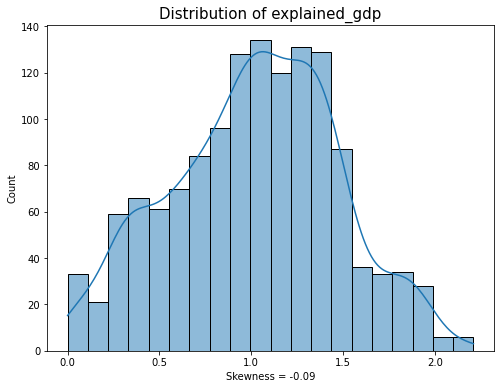

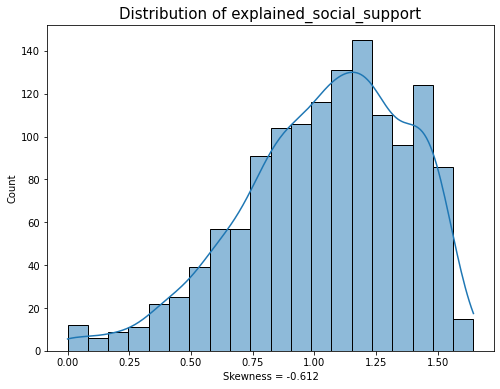

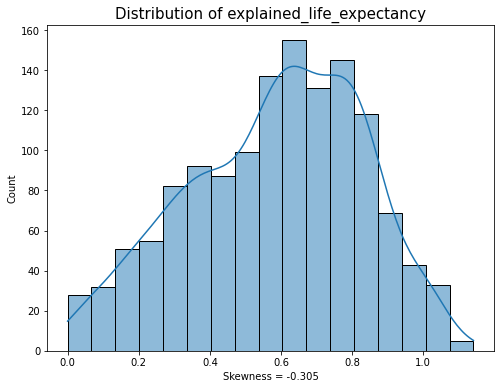

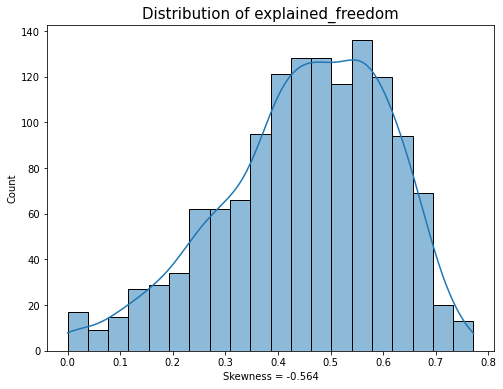

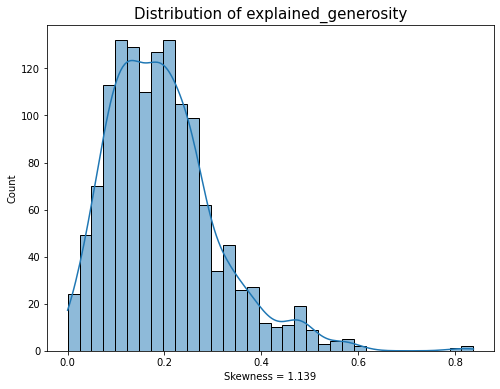

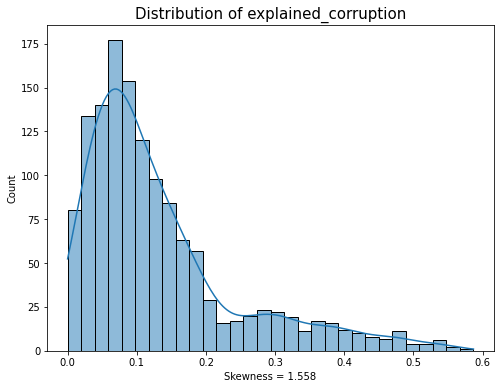

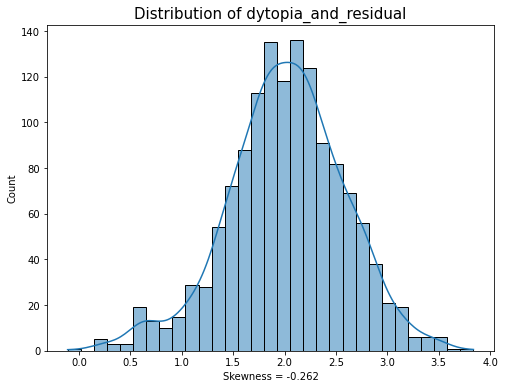

In [30]:
'''
Understand the distribution for the continuous numeric features within the dataset.
The code below will loop through each feature and illustrate how the feature is distributed.
The skewness value will also be included below the chart.
'''
df_cont = df[['happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 
               'corruption_perception', 'dystopia_score', 'explained_gdp', 'explained_social_support',
               'explained_life_expectancy', 'explained_freedom', 'explained_generosity', 'explained_corruption',
               'dytopia_and_residual']]

for col in df_cont:
    plt.figure(figsize=(8,6))
    sns.histplot(x =df[col], kde = True, multiple = 'stack') 
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xlabel(f"Skewness = {round(df[col].skew(),3)}", fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

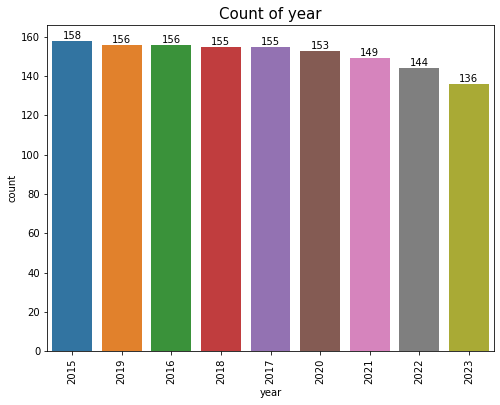

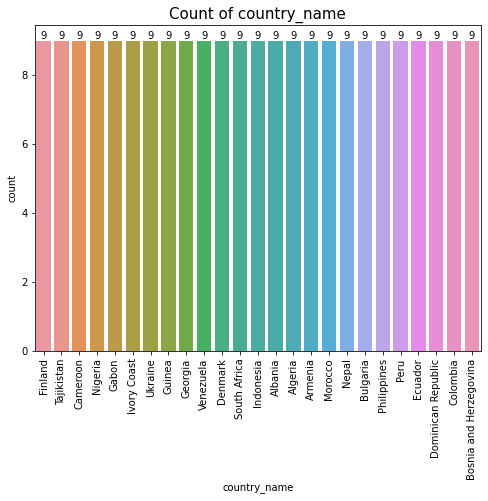

In [31]:
'''
Understand the balance of the categorical and discrete features with a countplot.
The code below will loop through each feature and illustrate the count of unique items within each feature.
Useful for understanding balance within the data.
'''
df_cat = df[['year', 'country_name']]

for col in df_cat:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=df[col], order = df[col].value_counts().iloc[:25].index)
    for label in ax.containers:
        ax.bar_label(label)
    plt.title("Count of {}".format(col), fontsize=15) 
    plt.xticks(fontsize=10, rotation = 90) 
    plt.yticks(fontsize=10)
    plt.show()

### Highlights for Univariate Analysis: 
<ul>
    <li> Histogram of Happiness Score appears as a normal distribution with a low skewness value of -0.079.
    <li> GDP per Capita is skewed (left tailed) with a value of -1.776.
    <li> Social Support is skewed (left tailed) with a value of -1.226.
    <li> Healthy Life Expectancy is skewed (left tailed) with a value of -2.781.
    <li> Freedom of Choice is skewed (left tailed) with a value of -1.278.
    <li> Generosity is slightly skewed (right tailed) with a value of 0.996.
    <li> Perception of corruption is skewed (left tailed) with a value of -1.637.
    <li> There were only 136 countries in 2023 (lowest over the 9 year span) compared to 158 countries in the study in 2015 (highest over the 9 year span). 
    <li> Over 100 countries have appeared in the study for all 9 years.
<ul>

### Multivariate Analysis

Text(0.5, 1.0, 'Initial Correlation Heatmap of Happiness Score')

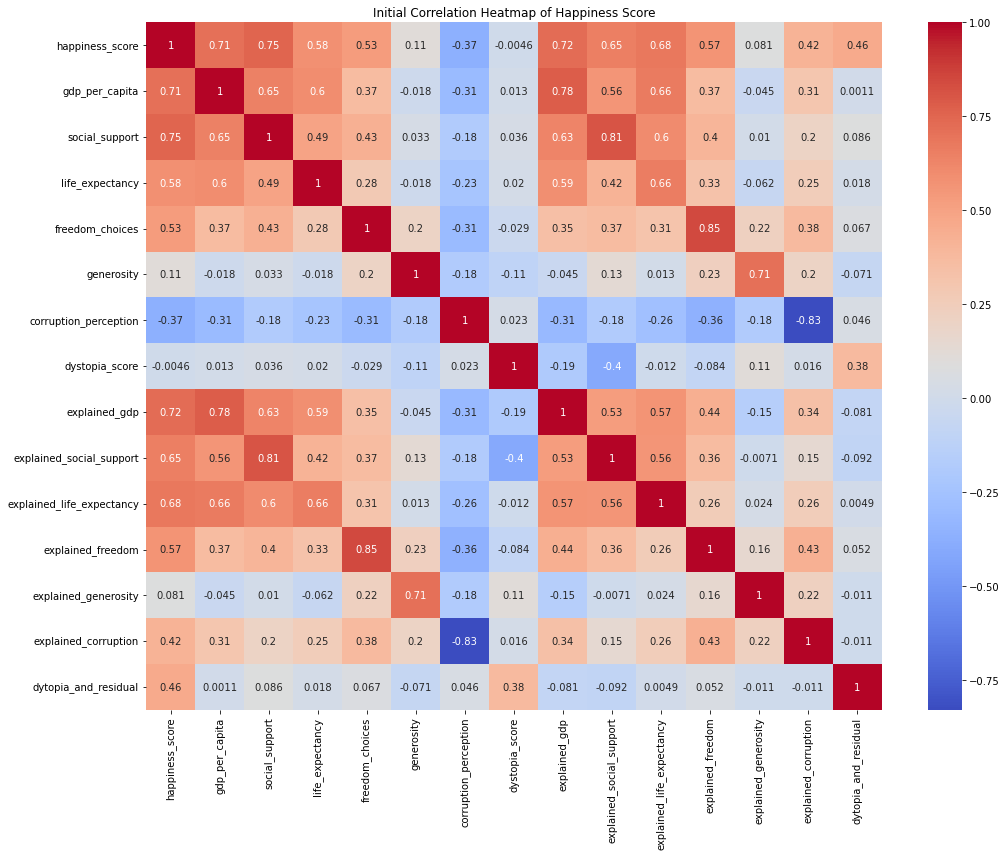

In [32]:
'''
Display a correlation heatmap for Happiness Score. Utilize sns.heatmap() to generate the figure.
'''
## Calculate the correlation coefficient with corr().
correlation_number = df_cont.corr()

## Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Initial Correlation Heatmap of Happiness Score')

Removing the explained features for the six core variables since there is multicollinearity present. For example, only need to include gdp_per_capita or explained_gdp, not both.

Text(0.5, 1.0, 'Initial Correlation Heatmap of Happiness Score (Removed Duplicate Features)')

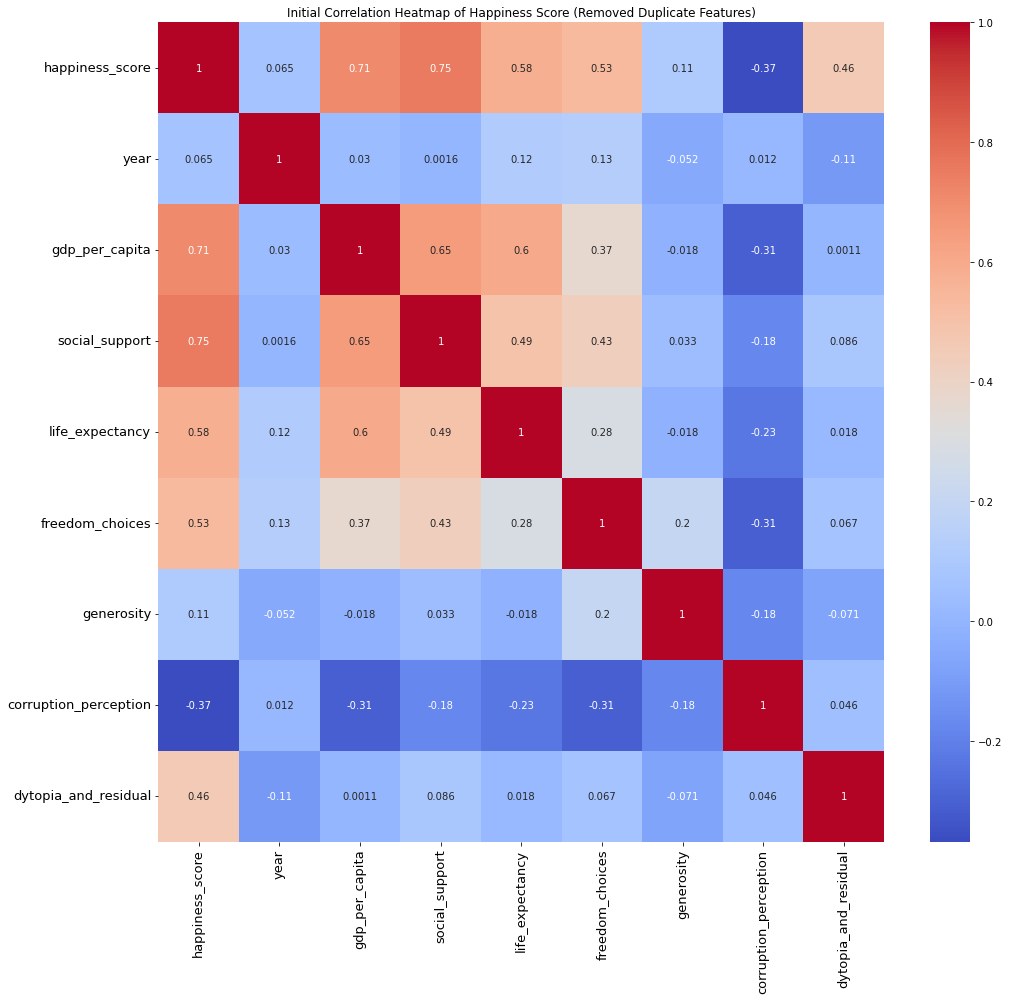

In [96]:
'''
Display a correlation heatmap for Happiness Score with revised features. Utilize sns.heatmap() to generate the figure.
'''
revised_df = df[['happiness_score', 'year', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 
                 'generosity', 'corruption_perception', 'dytopia_and_residual']]

## Calculate the correlation coefficient with corr().
correlation_number = revised_df.corr()

## Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(15,14), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13) 
plt.title('Initial Correlation Heatmap of Happiness Score (Removed Duplicate Features)')

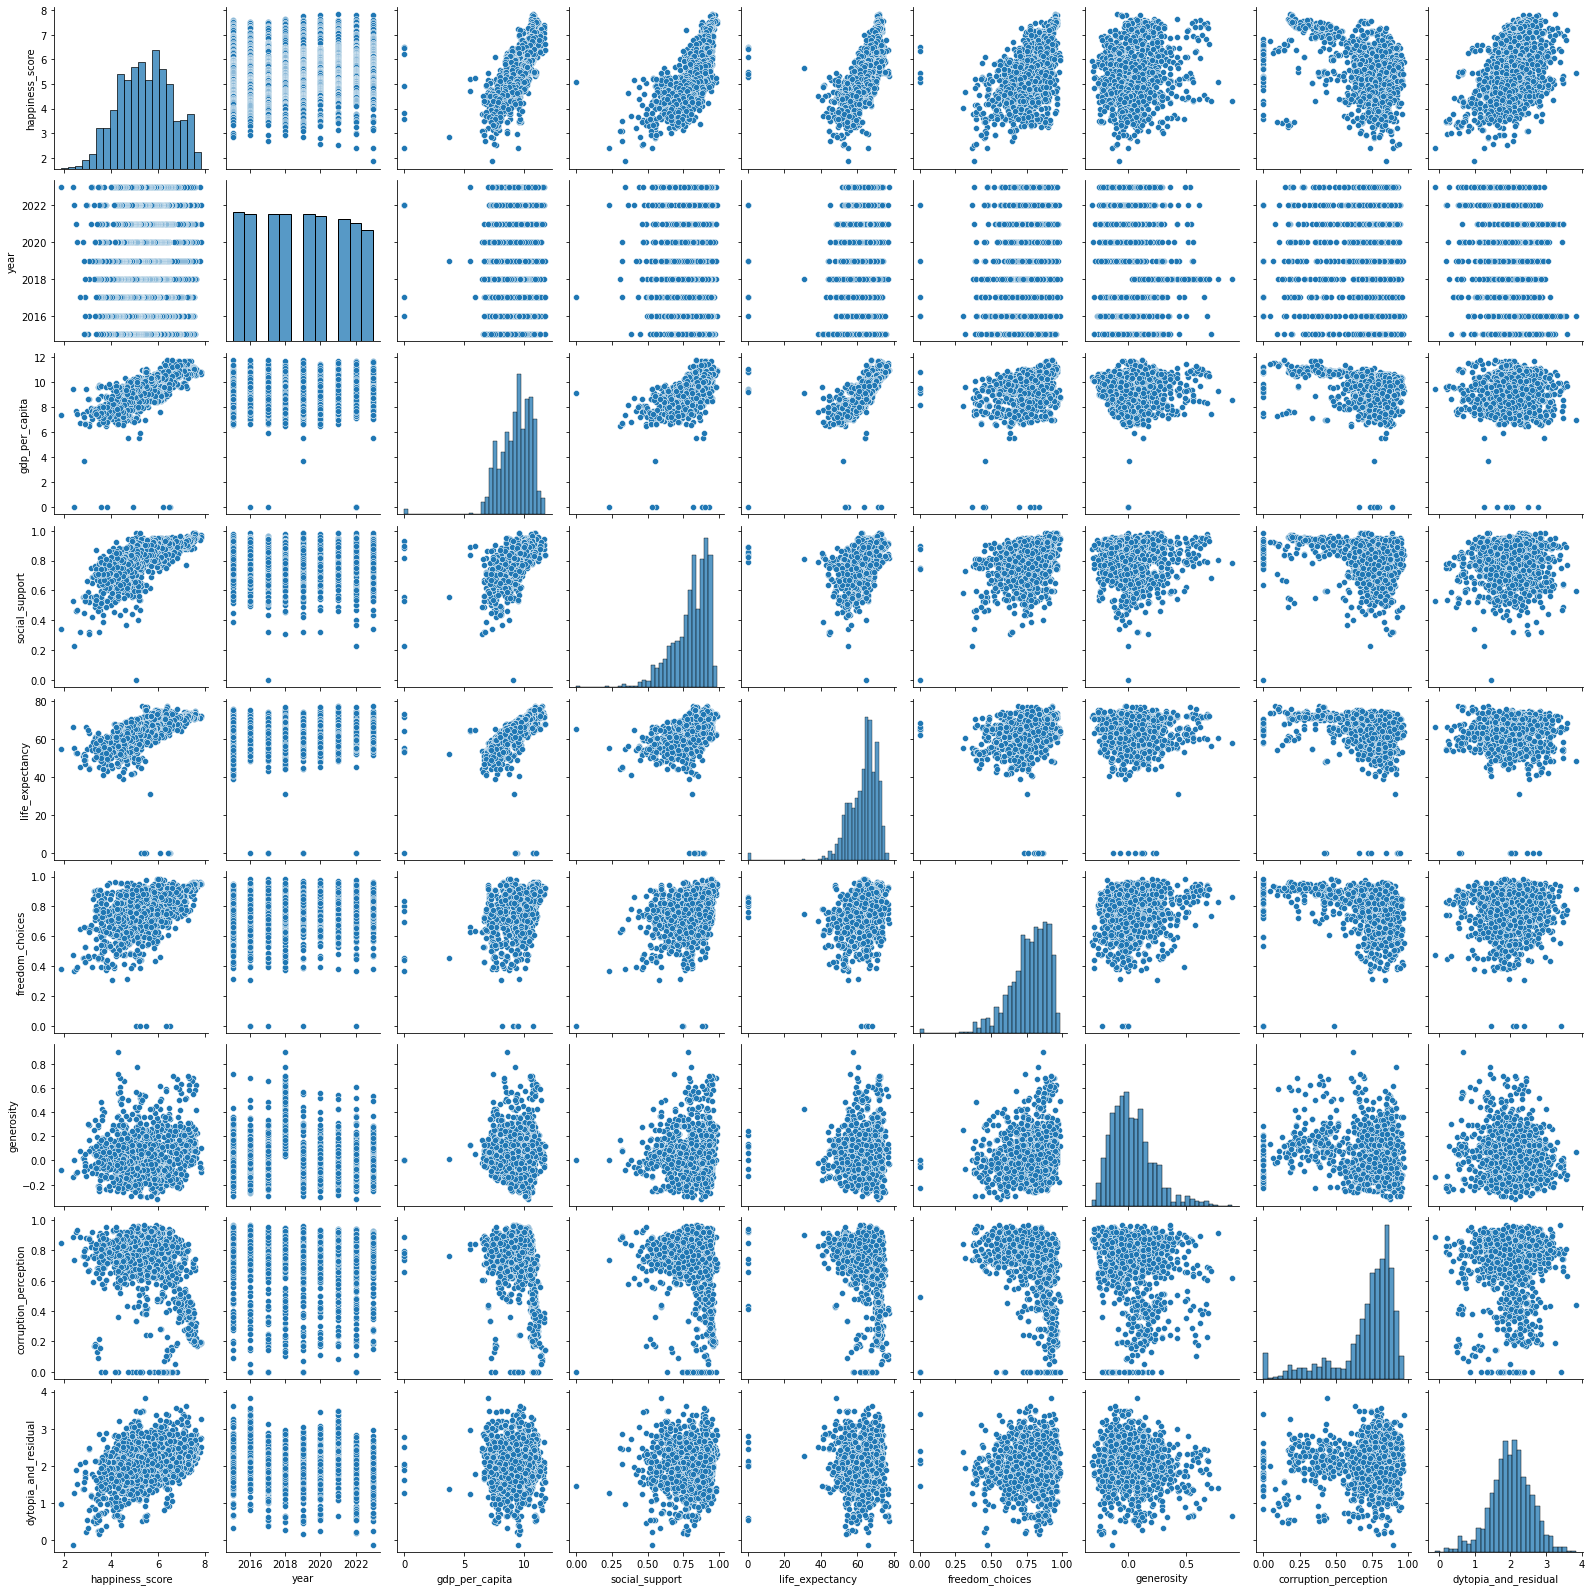

In [34]:
'''
Attempt to perform sns.pairplot() to illustrate visualizations for variables in data set.
'''
sns.pairplot(revised_df)
plt.show()

In [35]:
'''
Count the number of times a country has been in the top 50 since 2015.
'''
rank_count_50 = df[df['rank'] < 50].groupby('country_name')['rank'].count().sort_values(ascending = False)
rank_count_50_df = pd.DataFrame(data = rank_count_50)
rank_count_50_df.head()

rank
country_name      
Luxembourg       9
Finland          9
Germany          9
Guatemala        9
Iceland          9

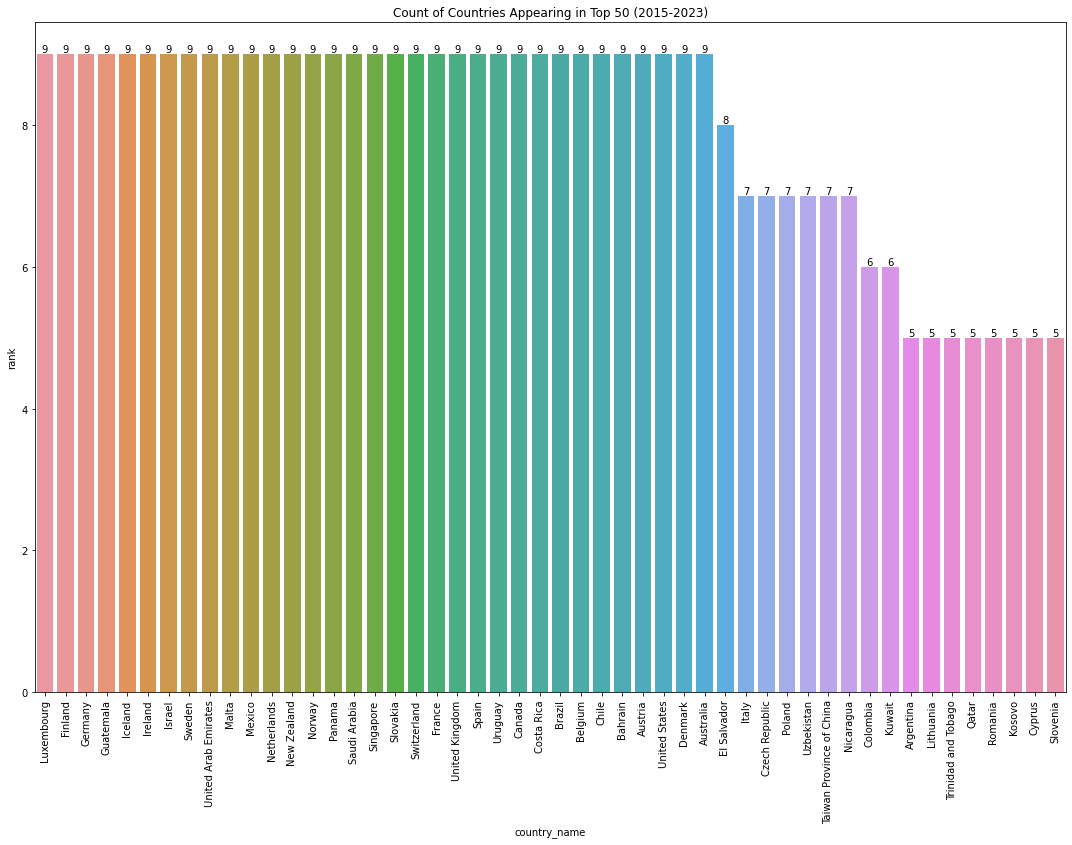

In [36]:
'''
Generate bar chart showing number of times a country has been in the top 50 since 2015.
'''
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = rank_count_50_df.index, y = 'rank', data = rank_count_50_df,
            order = rank_count_50_df.iloc[:50].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Count of Countries Appearing in Top 50 (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [37]:
'''
Count the number of times a country has been in the top 25 since 2015.
'''
rank_count_25 = df[df['rank'] < 25].groupby('country_name')['rank'].count().sort_values(ascending = False)
rank_count_25_df = pd.DataFrame(data = rank_count_25)
rank_count_25_df.head()

rank
country_name        
Iceland            9
Finland            9
Sweden             9
United Kingdom     9
United States      9

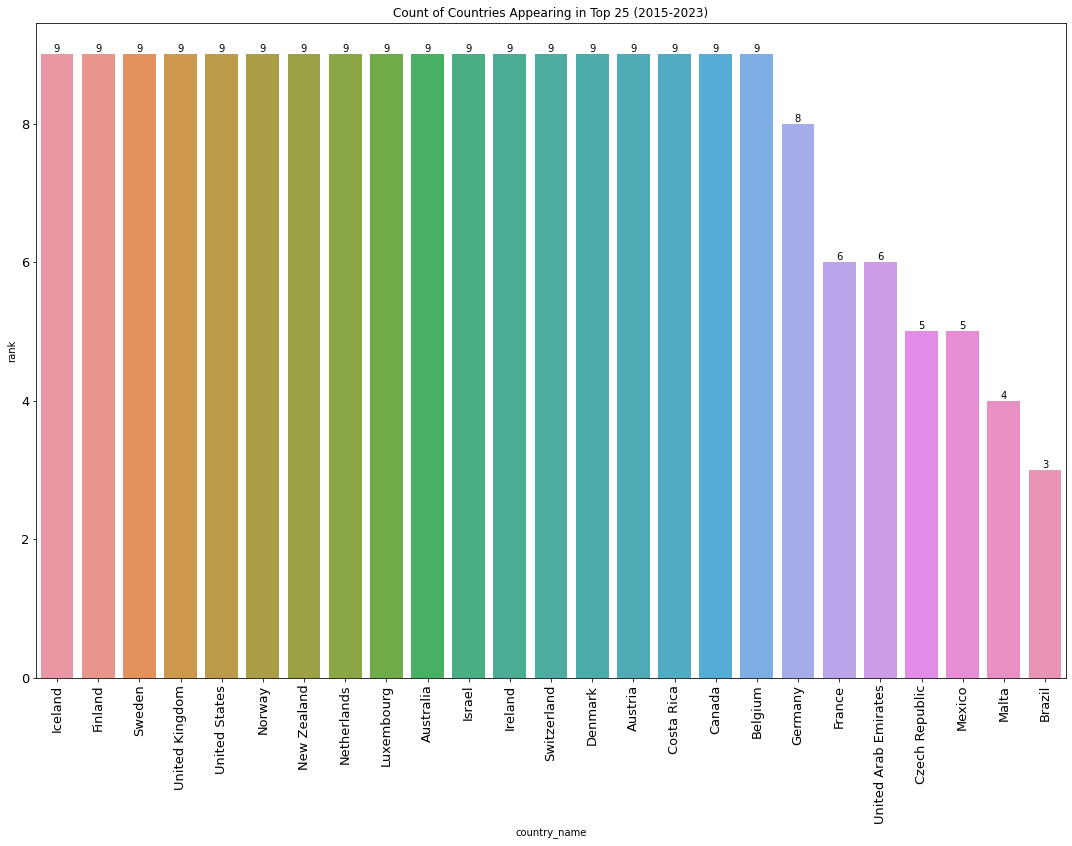

In [95]:
'''
Generate bar chart showing number of times a country has been in the top 25 since 2015.
'''
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = rank_count_25_df.index, y = 'rank', data = rank_count_25_df,
            order = rank_count_25_df.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Count of Countries Appearing in Top 25 (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=13) 
plt.show()

In [39]:
'''
Count the number of times a country has been in the top 10 since 2015.
'''
rank_count_10 = df[df['rank'] < 10].groupby('country_name')['rank'].count().sort_values(ascending = False)
rank_count_10_df = pd.DataFrame(data = rank_count_10)
rank_count_10_df.head()

rank
country_name      
Denmark          9
Finland          9
Iceland          9
Netherlands      9
Norway           9

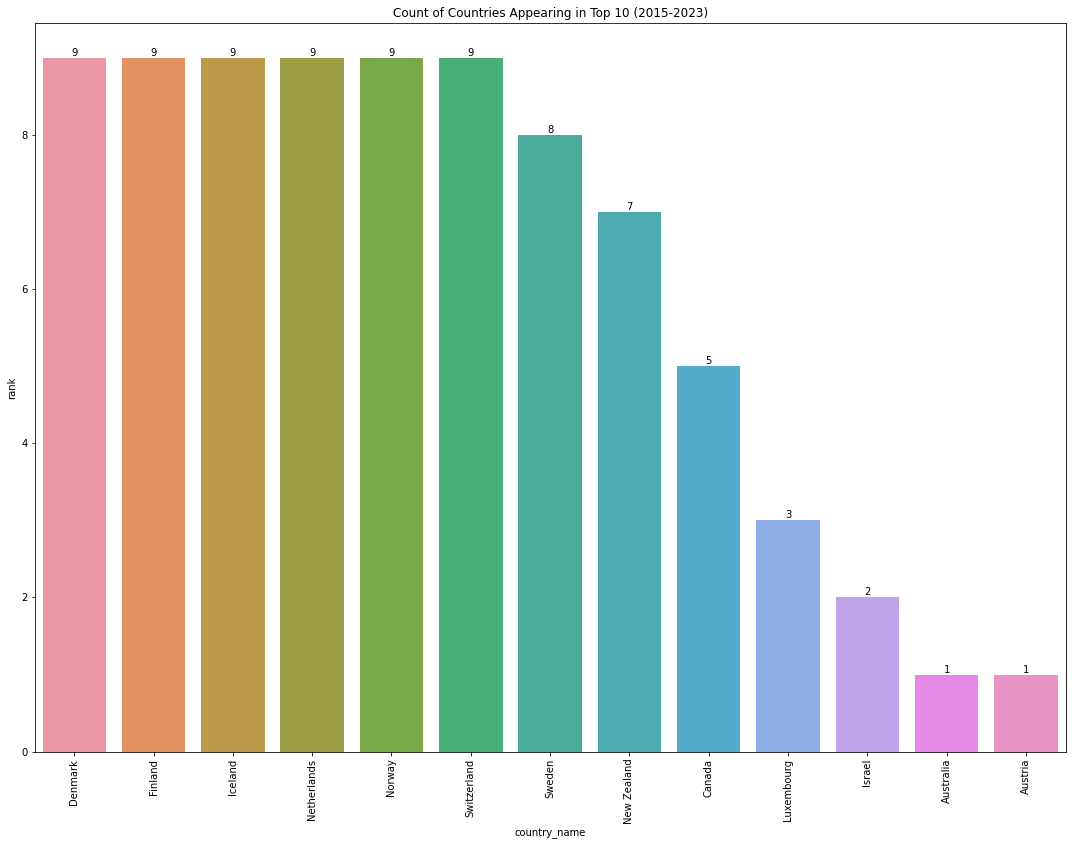

In [40]:
'''
Generate bar chart showing number of times a country has been in the top 10 since 2015.
'''
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = rank_count_10_df.index, y = 'rank', data = rank_count_10_df,
            order = rank_count_10_df.iloc[:50].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Count of Countries Appearing in Top 10 (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [41]:
'''
Count the number of times a country has been in the top 5 since 2015.
'''
rank_count_5 = df[df['rank'] < 5].groupby('country_name')['rank'].count().sort_values(ascending = False)
rank_count_5_df = pd.DataFrame(data = rank_count_5)
rank_count_5_df.head()

rank
country_name      
Denmark          9
Iceland          9
Finland          6
Switzerland      6
Norway           5

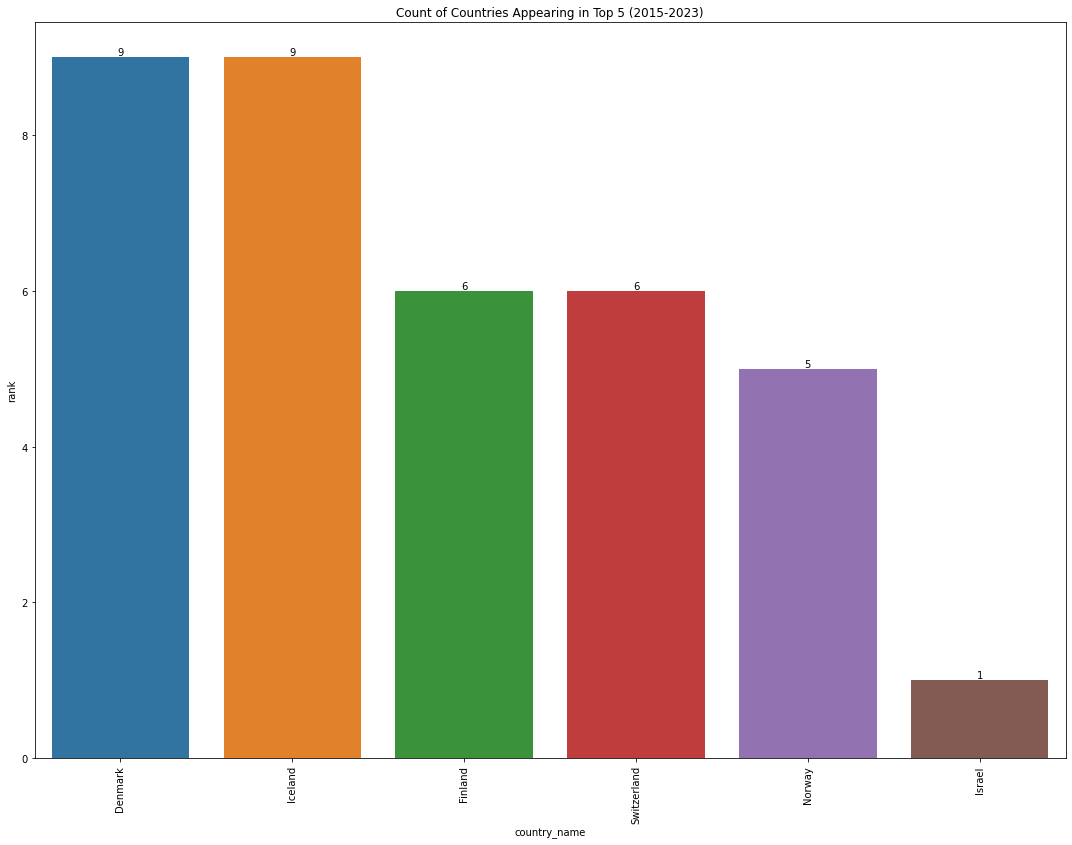

In [42]:
'''
Generate bar chart showing number of times a country has been in the top 5 since 2015.
'''
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = rank_count_5_df.index, y = 'rank', data = rank_count_5_df,
            order = rank_count_5_df.iloc[:50].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Count of Countries Appearing in Top 5 (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [43]:
'''
Count the number of times a country has been in the bottom 25 since 2015.
'''
rank_count_bottom_25 = df[df['rank'] > 143].groupby('country_name')['rank'].count().sort_values(ascending = True)
rank_count_bottom_25_df = pd.DataFrame(data = rank_count_bottom_25)
rank_count_bottom_25_df.head()

rank
country_name      
Lebanon          1
Uganda           1
Cambodia         1
Niger            1
India            1

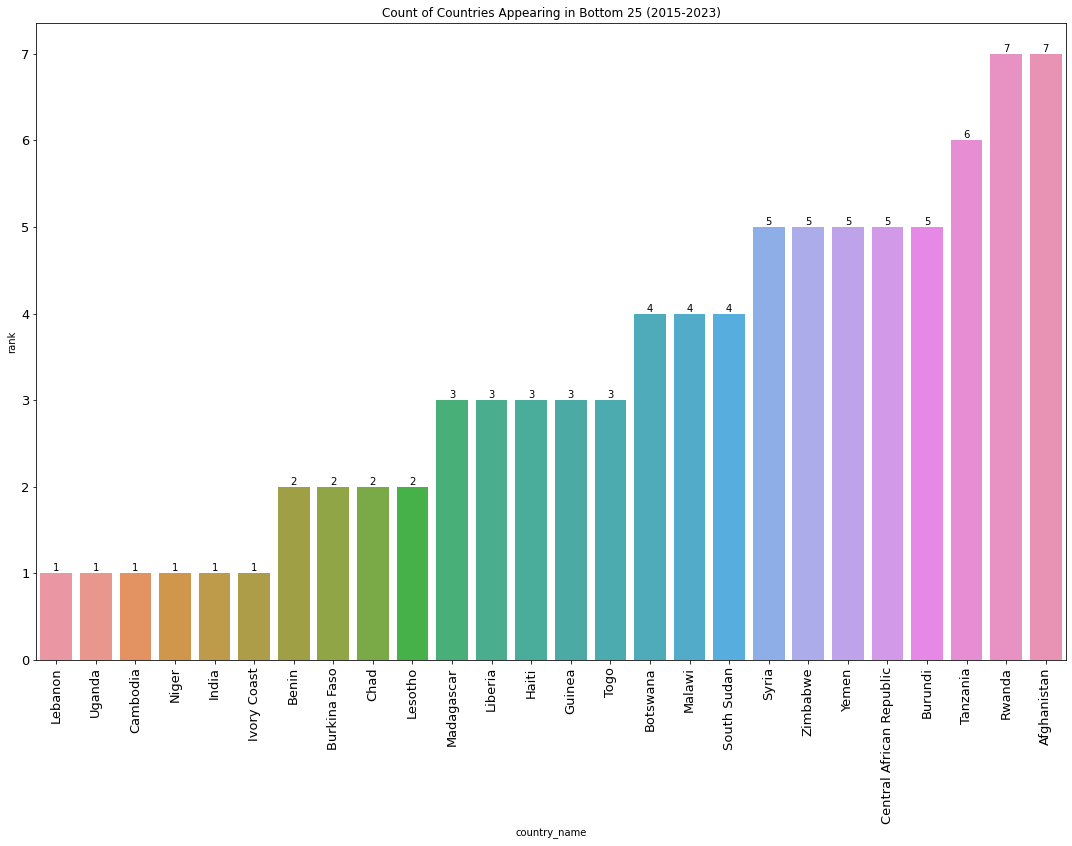

In [94]:
'''
Generate bar chart showing number of times a country has been in the bottom 25 since 2015.
'''
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = rank_count_bottom_25_df.index, y = 'rank', data = rank_count_bottom_25_df,
            order = rank_count_bottom_25_df.iloc[:50].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Count of Countries Appearing in Bottom 25 (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=13) 
plt.show()

### Highlights for Multivariate Analysis: 
<ul>
    <li> Happiness Score and Social Support (0.75), GDP per Capita (0.71), Healthy Life Expectancy (0.58), Freedom of Choices (0.53), and Dystopia + Residual (0.46) all have a positive strong correlation. 
    <li> Happiness Score and Perception of Corruption (-0.37) have a moderate indirect relationship. 
    <li> Denmark (9), Iceland (9), Finland (6), Switzerland (6), and Norwary (5) have the most top 5 Happiness Rankings out of all countries in the study.
    <li> Afghanistan (7), Rwanda (7), Tanania (6), Burundi (5), Central African Republic (5), Yemen (5), Zimbabwe (5), and Syria (5) had the most bottom 25 Happiness Ranking appearances out of all countries. 
<ul>

### More Exploratory Data Analysis (EDA)

Interested in further evaluating variable relationships in this section.

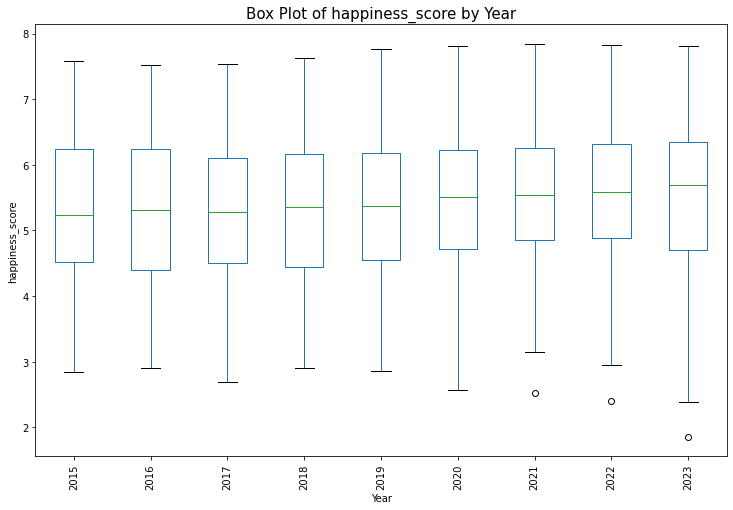

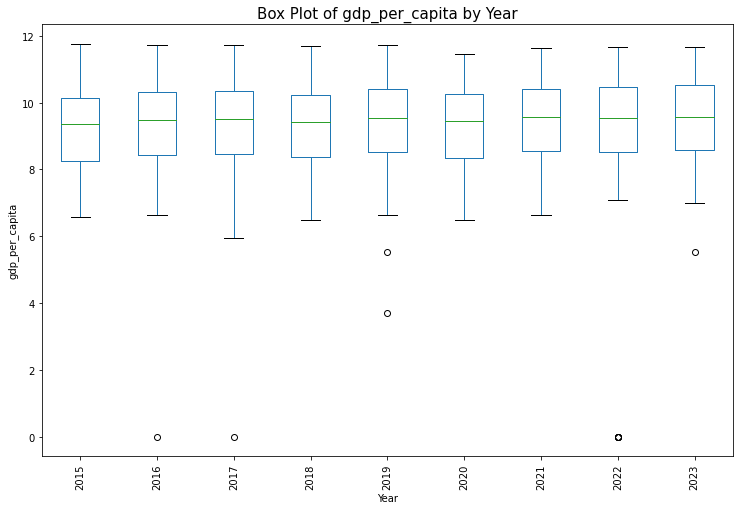

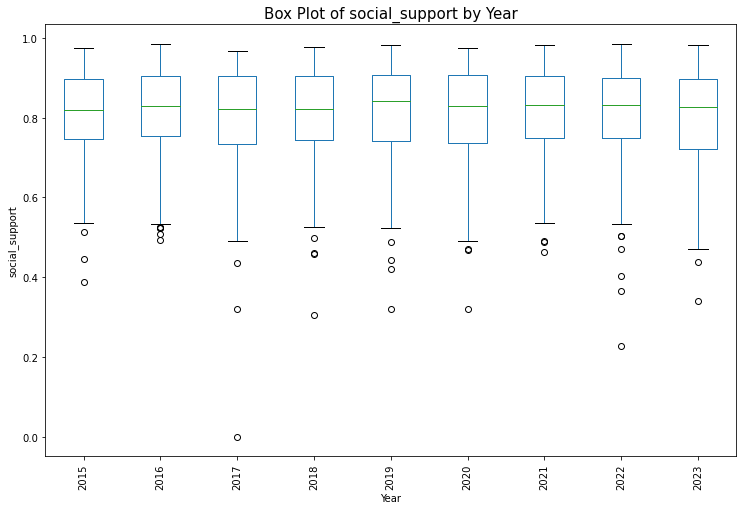

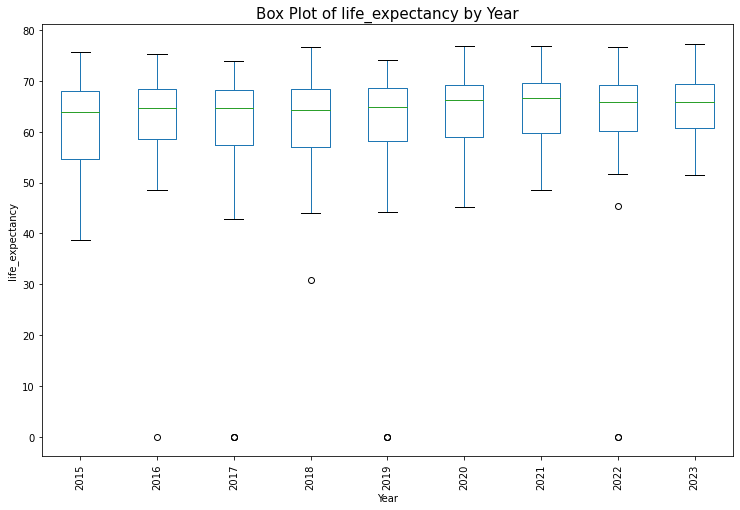

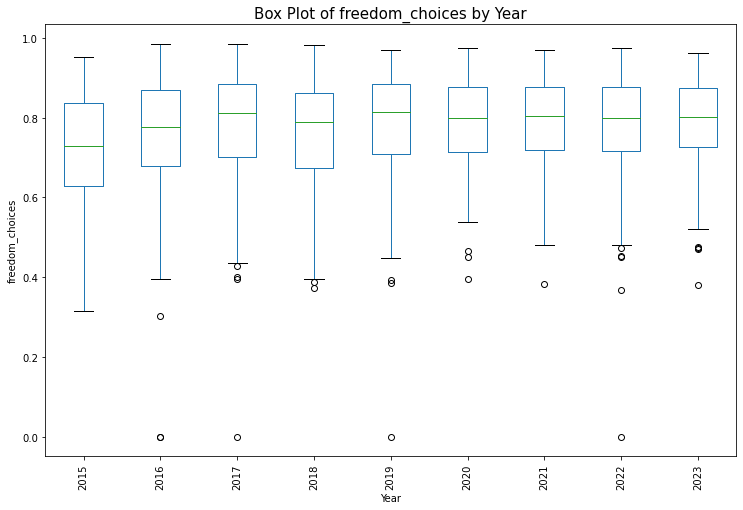

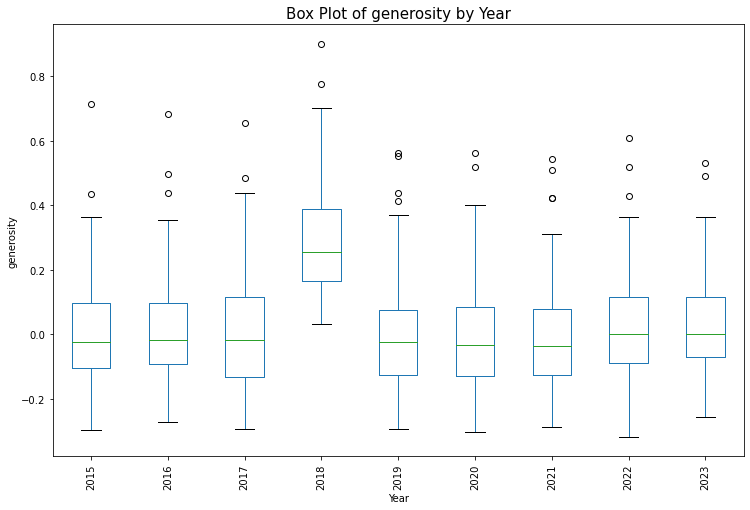

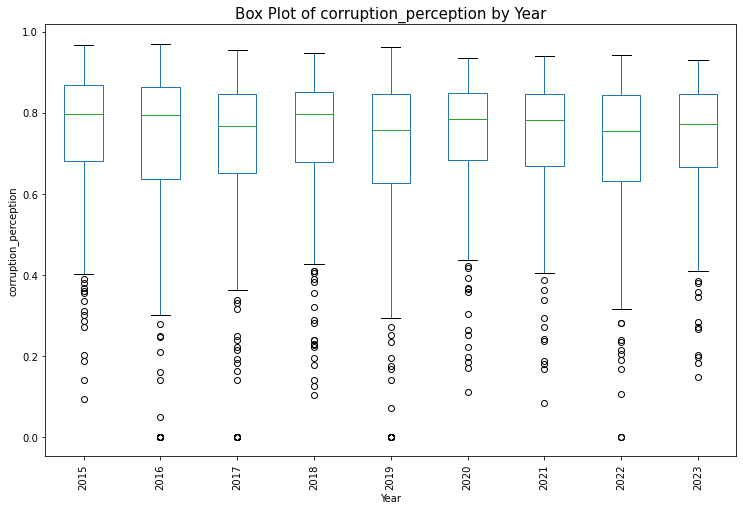

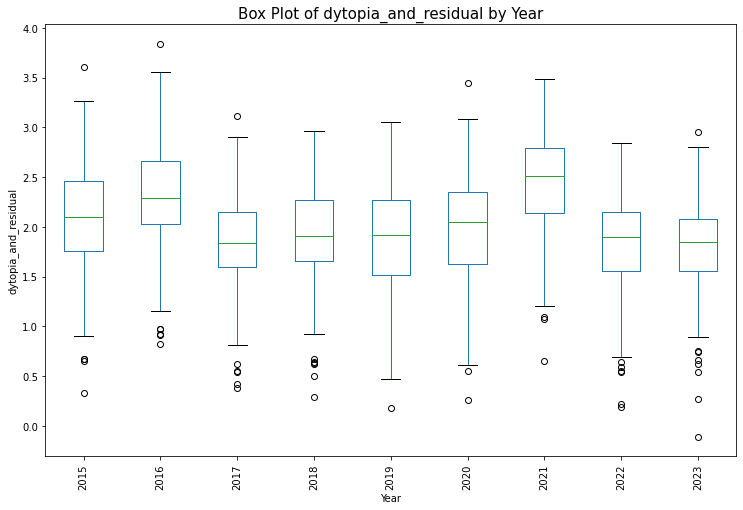

In [45]:
'''
Generate a boxplot of the core features by year.
'''
core_df = df[['happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 
               'corruption_perception','dytopia_and_residual']]
for col in core_df:
    df.boxplot(column = col, by = 'year', figsize=(12,8), grid = False)
    plt.title("Box Plot of {} by Year".format(col), fontsize=15) 
    plt.xlabel("Year".format(col), fontsize=10)
    plt.ylabel("{}".format(col))
    plt.suptitle('')
    plt.xticks(fontsize=10, rotation = 90)
    plt.yticks(fontsize=10) 
    plt.show()

Additional classifications will be created based on the happiness data distribution. There will be unhappy (below 25%), fairly unhappy (between 25%-50%), fairly happy (between 50%-75%), and happy (above 75%). 

In [46]:
'''
Understand the descriptive statistics for gdp per capita for classification of happiness.
'''
df['gdp_per_capita'].describe()

count    1362.000000
mean        9.302795
std         1.384134
min         0.000000
25%         8.458065
50%         9.499572
75%        10.352575
max        11.758369
Name: gdp_per_capita, dtype: float64

In [47]:
'''
Understand the descriptive statistics for social support for classification of happiness.
'''
df['social_support'].describe()

count    1362.000000
mean        0.804590
std         0.124942
min         0.000000
25%         0.741445
50%         0.828112
75%         0.902953
max         0.984940
Name: social_support, dtype: float64

In [48]:
'''
Understand the descriptive statistics for life expectancy for classification of happiness.
'''
df['life_expectancy'].describe()

count    1362.000000
mean       63.293976
std         8.770184
min         0.000000
25%        58.753194
50%        65.299534
75%        69.000000
max        77.279778
Name: life_expectancy, dtype: float64

In [49]:
'''
Understand the descriptive statistics for freedom choices for classification of happiness.
'''
df['freedom_choices'].describe()

count    1362.000000
mean        0.768766
std         0.137003
min         0.000000
25%         0.700140
50%         0.790610
75%         0.875000
max         0.985178
Name: freedom_choices, dtype: float64

In [50]:
'''
Understand the descriptive statistics for generosity for classification of happiness.
'''
df['generosity'].describe()

count    1362.000000
mean        0.035307
std         0.184127
min        -0.316425
25%        -0.098566
50%         0.004081
75%         0.130350
max         0.899886
Name: generosity, dtype: float64

In [51]:
'''
Understand the descriptive statistics for corruption perceptionfor classification of happiness.
'''
df['corruption_perception'].describe()

count    1362.000000
mean        0.709922
std         0.214476
min         0.000000
25%         0.660595
50%         0.778625
75%         0.850561
max         0.969483
Name: corruption_perception, dtype: float64

In [52]:
'''
Understand the descriptive statistics for happiness score for classification of happiness.
'''
df['happiness_score'].describe()

count    1362.000000
mean        5.441041
std         1.118578
min         1.859000
25%         4.597650
50%         5.448100
75%         6.256950
max         7.842000
Name: happiness_score, dtype: float64

In [53]:
'''
Define the 25%, 50%, and 75% quartile marks for happiness scores.
'''
first_quartile = np.quantile(df['happiness_score'], 0.25)
second_quartile = np.quantile(df['happiness_score'], 0.50)
third_quartile = np.quantile(df['happiness_score'], 0.75)
print('25% Quartile is: {}'.format(first_quartile))
print('50% Quartile is: {}'.format(second_quartile))
print('75% Quartile is: {}'.format(third_quartile))

25% Quartile is: 4.597650024414063
50% Quartile is: 5.4481000900268555
75% Quartile is: 6.256949872970581


In [54]:
'''
Create a custom function for creating a happiness_category based on happiness score.
'''

def happiness_category(happiness_score):
    if happiness_score < first_quartile:
        return 'unhappy'
    elif happiness_score > first_quartile and happiness_score < second_quartile:
        return 'fairly unhappy'
    elif happiness_score > second_quartile and happiness_score < third_quartile:
        return 'fairly happy'
    else:
        return 'happy'

In [55]:
df['happiness_classification'] = df['happiness_score'].apply(happiness_category)
df['happiness_classification'].tail()

1362    unhappy
1363    unhappy
1364    unhappy
1365    unhappy
1366    unhappy
Name: happiness_classification, dtype: object

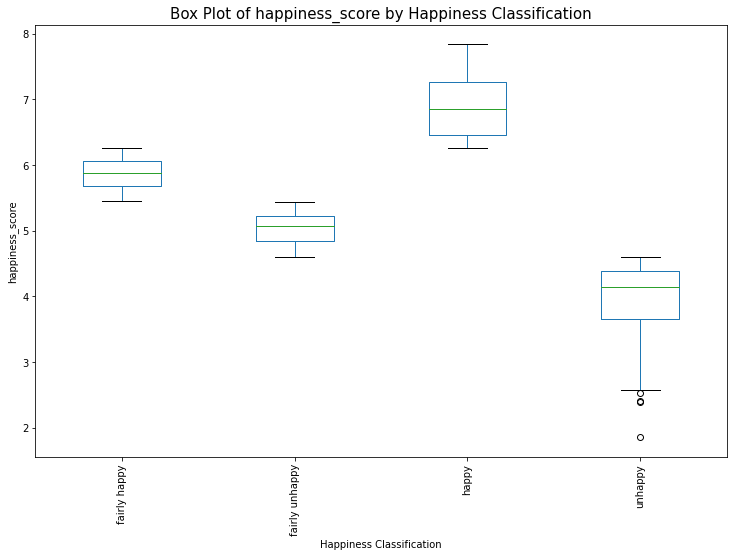

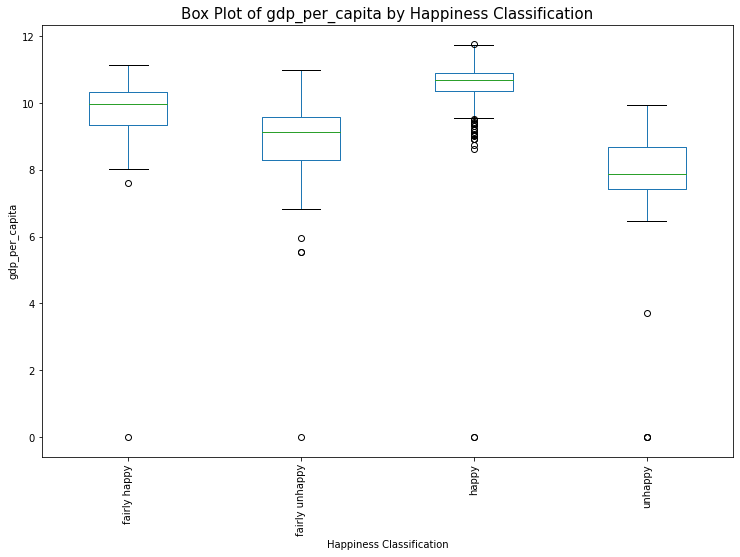

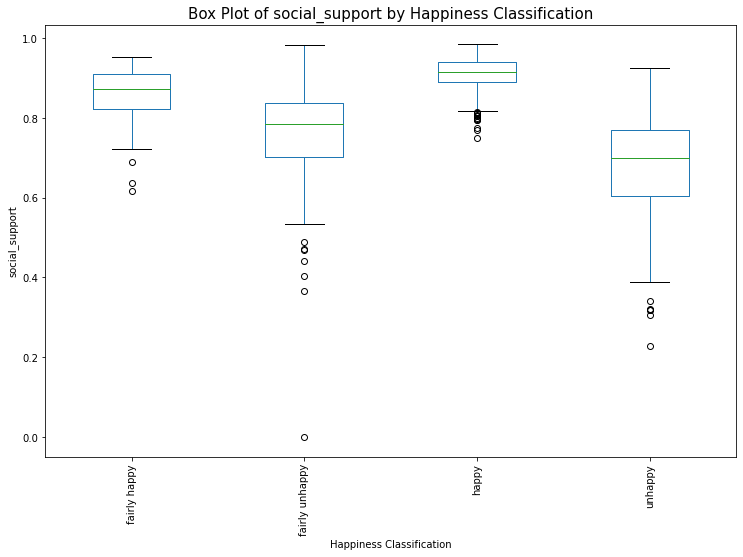

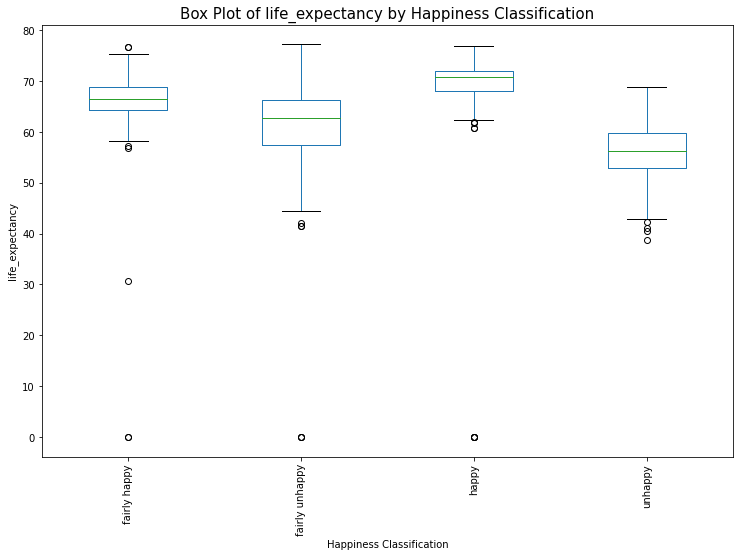

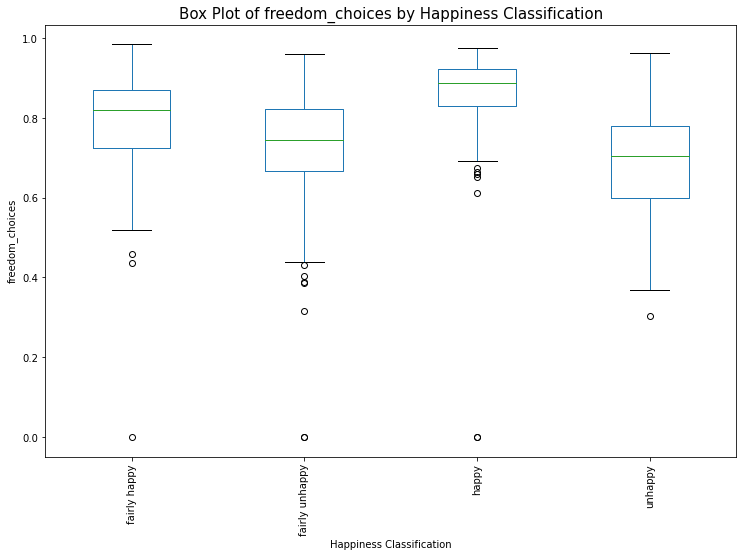

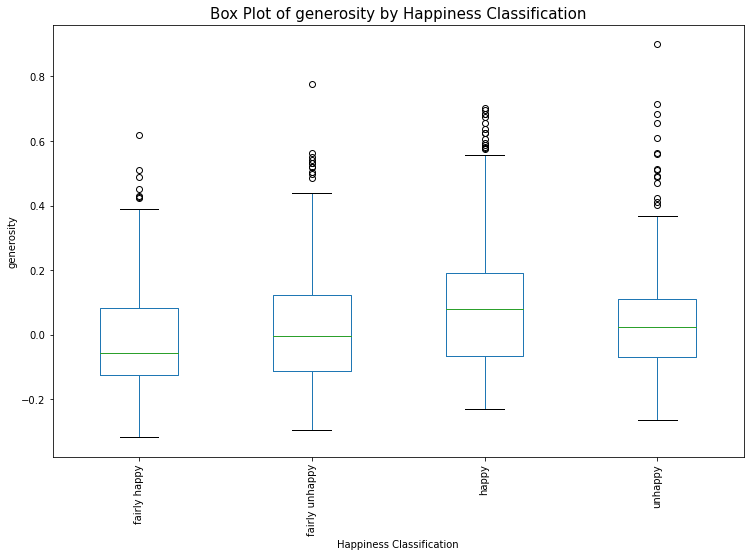

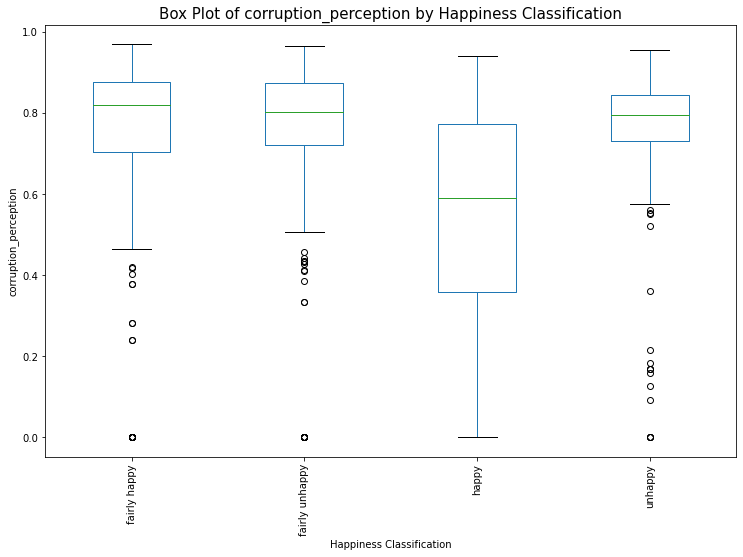

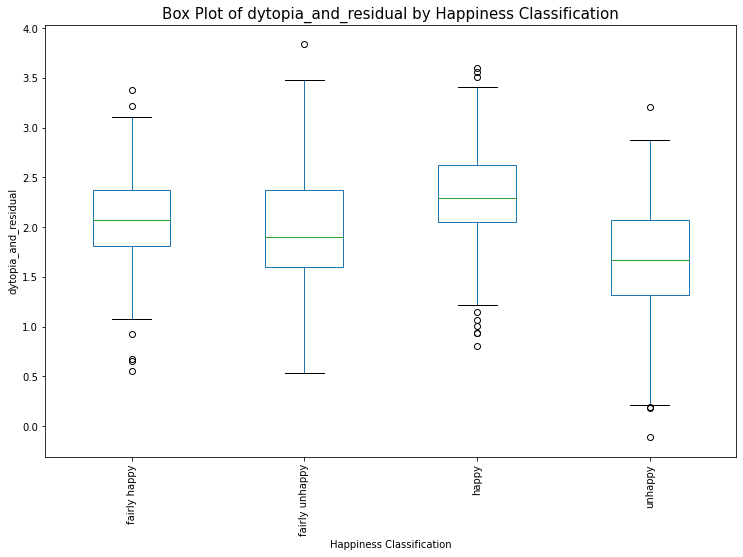

In [56]:
'''
Generate a boxplot of the core features by happiness classification.
'''
core_df = df[['happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 
               'corruption_perception','dytopia_and_residual']]
for col in core_df:
    df.boxplot(column = col, by = 'happiness_classification', figsize=(12,8), grid = False)
    plt.title("Box Plot of {} by Happiness Classification".format(col), fontsize=15) 
    plt.xlabel("Happiness Classification".format(col), fontsize=10)
    plt.ylabel("{}".format(col))
    plt.suptitle('')
    plt.xticks(fontsize=10, rotation = 90)
    plt.yticks(fontsize=10) 
    plt.show()

In [57]:
happiness_df = df[['happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 
                   'corruption_perception', 'dytopia_and_residual', 'happiness_classification']]

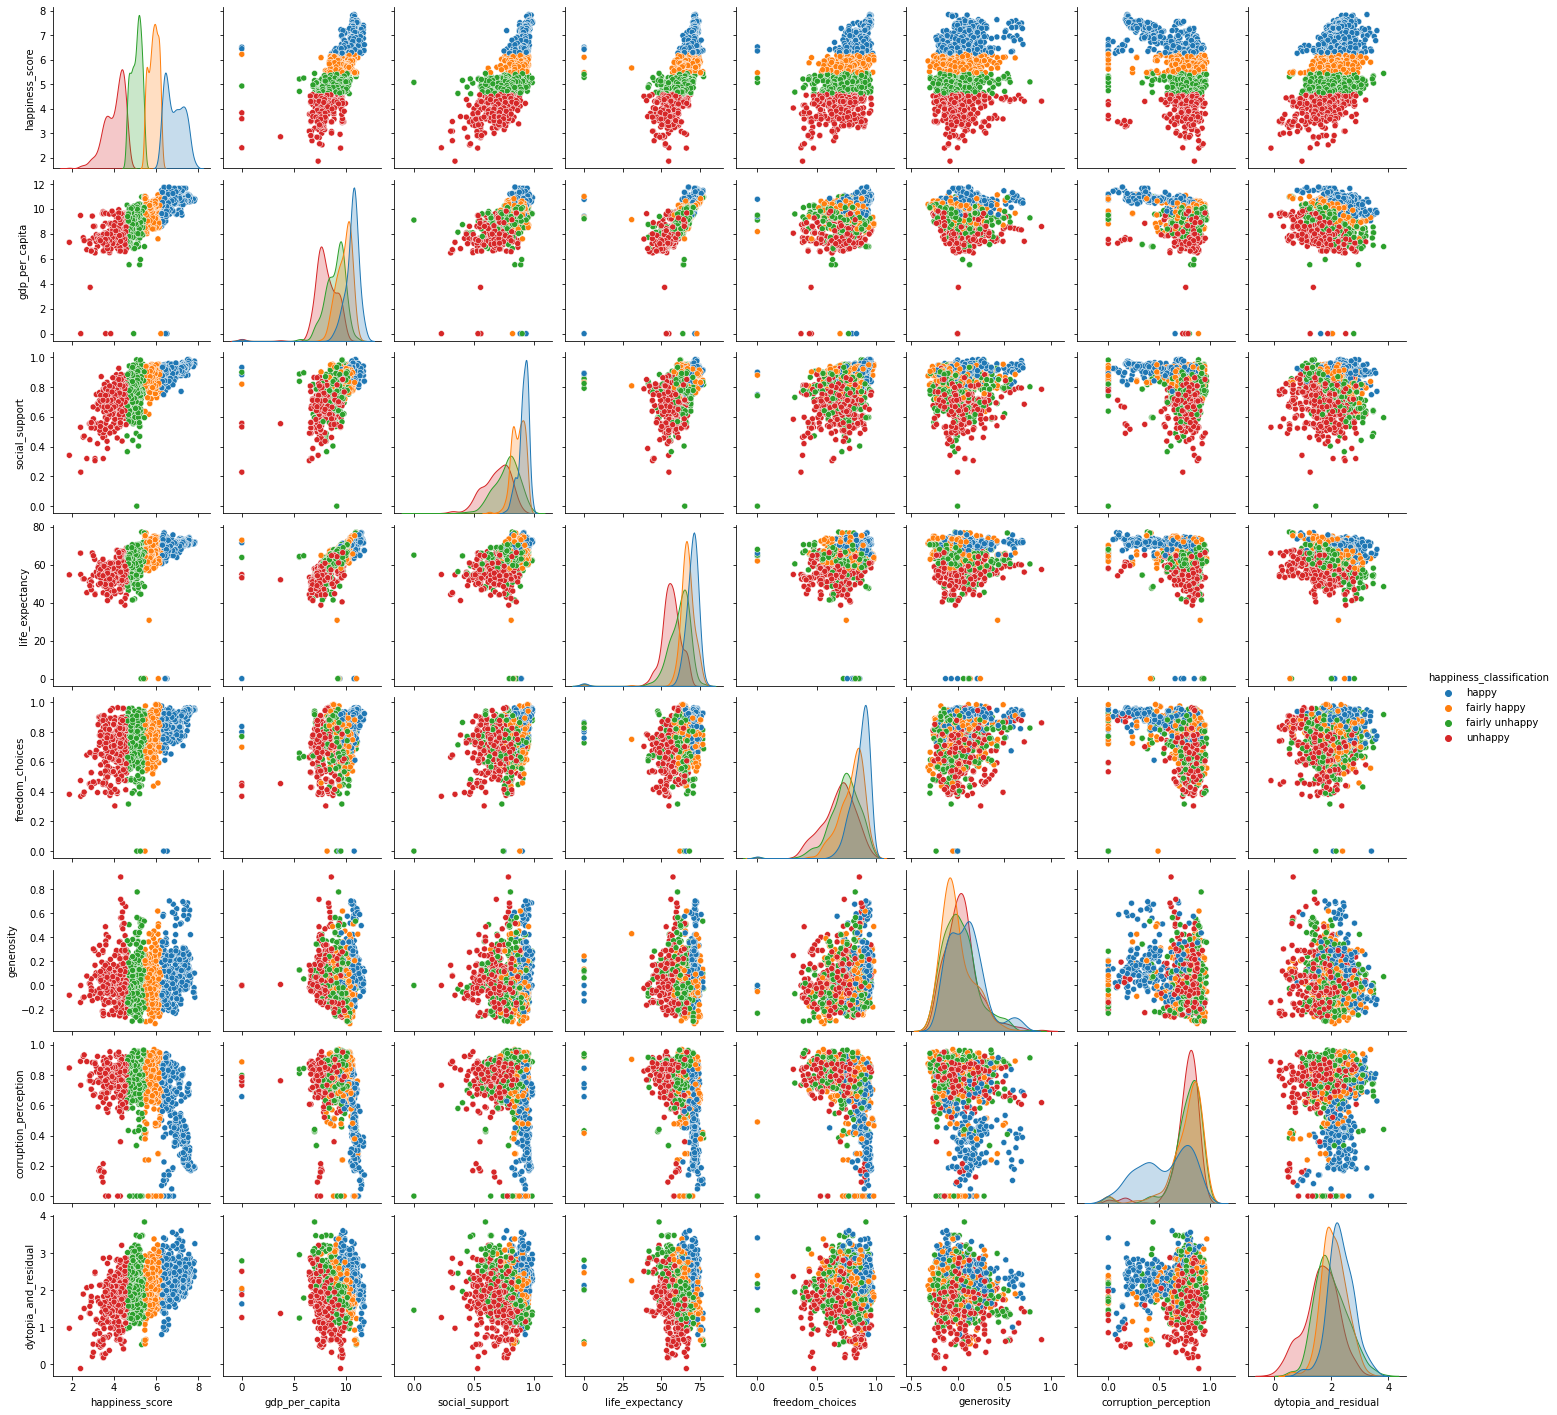

In [98]:
'''
Attempt to perform sns.pairplot() to illustrate visualizations for variables in data set.
'''
sns.pairplot(happiness_df, hue = 'happiness_classification') 
plt.show()

In [59]:
'''
Define the mean, median, max, min, and std  values from 2015-2023 for all countries.
Create a dictionary to store the values and make a new data frame for additional plots.
'''
overall_happiness_mean = df.groupby('country_name')['happiness_score'].mean().sort_values(ascending = False)
overall_happiness_median = df.groupby('country_name')['happiness_score'].median().sort_values(ascending = False)
overall_happiness_max = df.groupby('country_name')['happiness_score'].max().sort_values(ascending = False)
overall_happiness_min = df.groupby('country_name')['happiness_score'].min().sort_values(ascending = False)
overall_happiness_std = df.groupby('country_name')['happiness_score'].std().sort_values(ascending = False)

overall_happiness_dict = {'happiness_mean': overall_happiness_mean,
                         'happiness_median' : overall_happiness_median,
                         'happiness_max' : overall_happiness_max,
                         'happiness_min' : overall_happiness_min,
                         'happiness_std' : overall_happiness_std}

overall_happiness_df = pd.DataFrame(data = overall_happiness_dict,                                   )
overall_happiness_df.head()

happiness_mean  happiness_median  happiness_max  happiness_min  \
country_name                                                                   
Afghanistan         2.990722            3.2033         3.7940         1.8590   
Albania             4.893156            4.8827         5.2773         4.5860   
Algeria             5.409044            5.2946         6.3550         4.8870   
Angola              3.872200            3.8305         4.0330         3.7948   
Argentina           6.243522            6.0863         6.6500         5.9290   

              happiness_std  
country_name                 
Afghanistan        0.671049  
Albania            0.259602  
Algeria            0.464230  
Angola             0.112317  
Argentina          0.304625

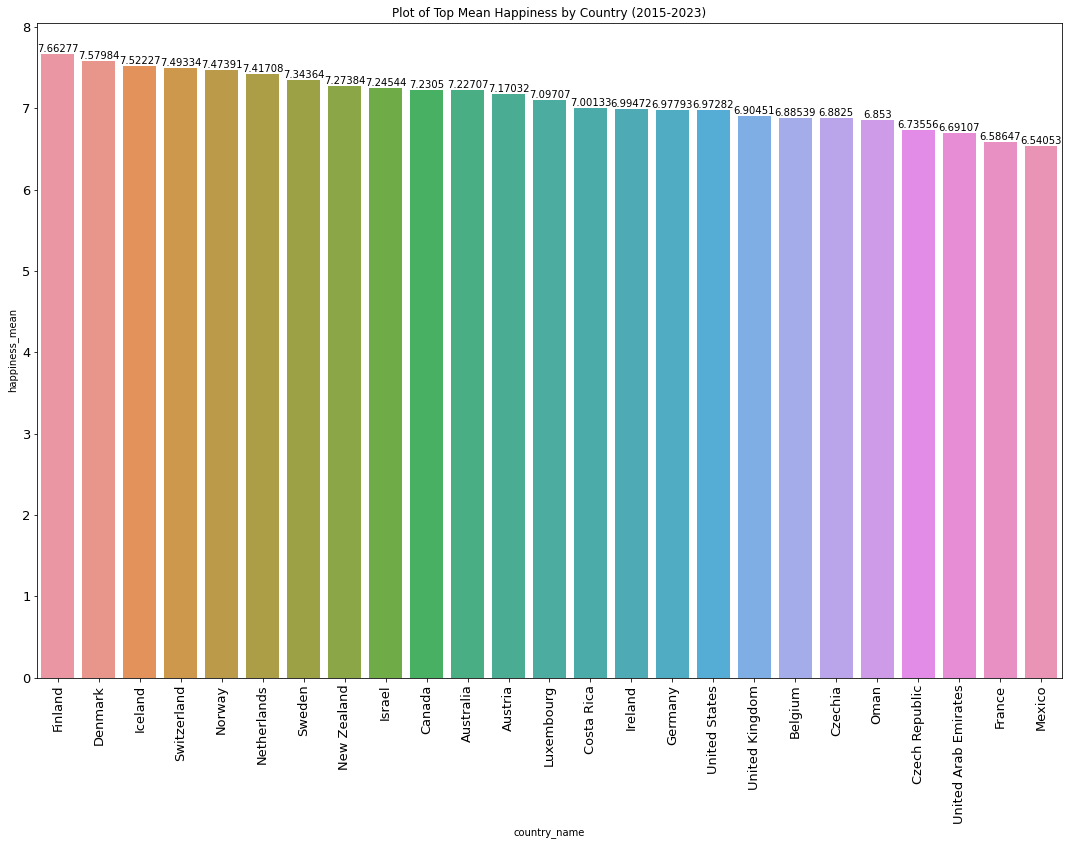

In [92]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
mean_order = overall_happiness_df.groupby('country_name')['happiness_mean'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_mean', data = overall_happiness_df,
            order = mean_order.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Top Mean Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=13) 
plt.show()

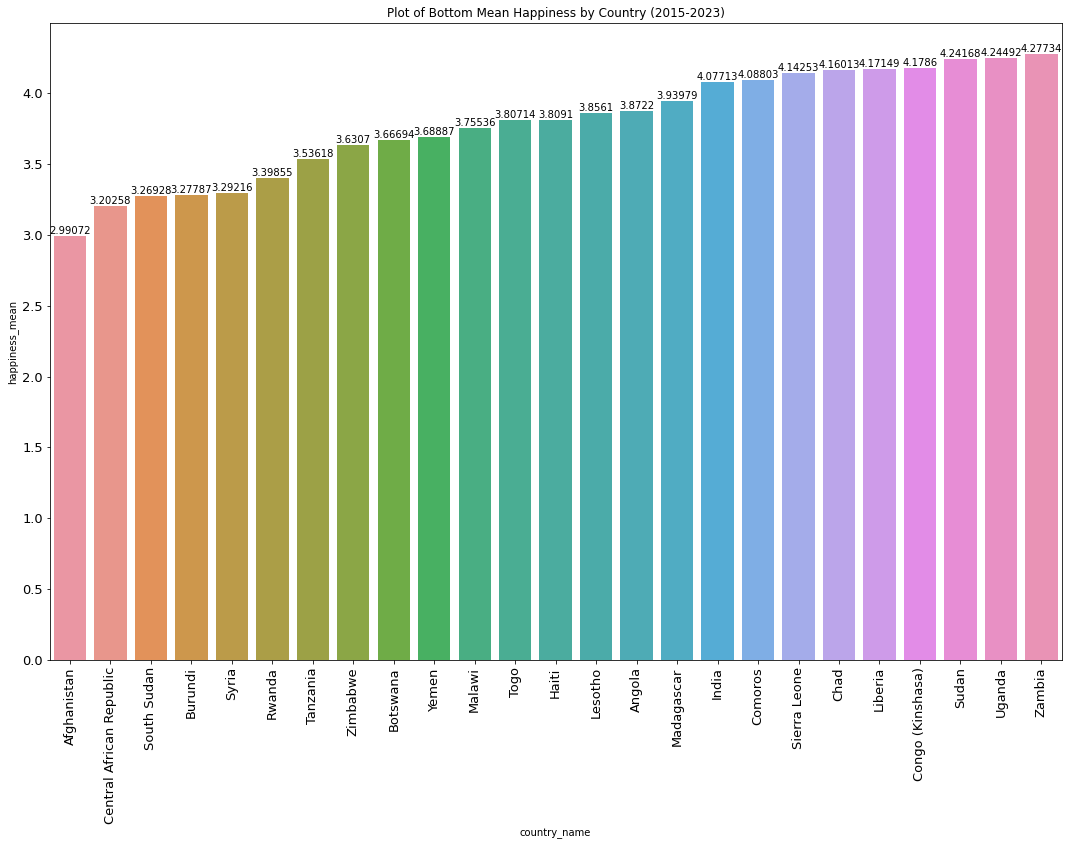

In [93]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
mean_order1 = overall_happiness_df.groupby('country_name')['happiness_mean'].mean().sort_values(ascending = True)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_mean', data = overall_happiness_df,
            order = mean_order1.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Bottom Mean Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=13) 
plt.show()

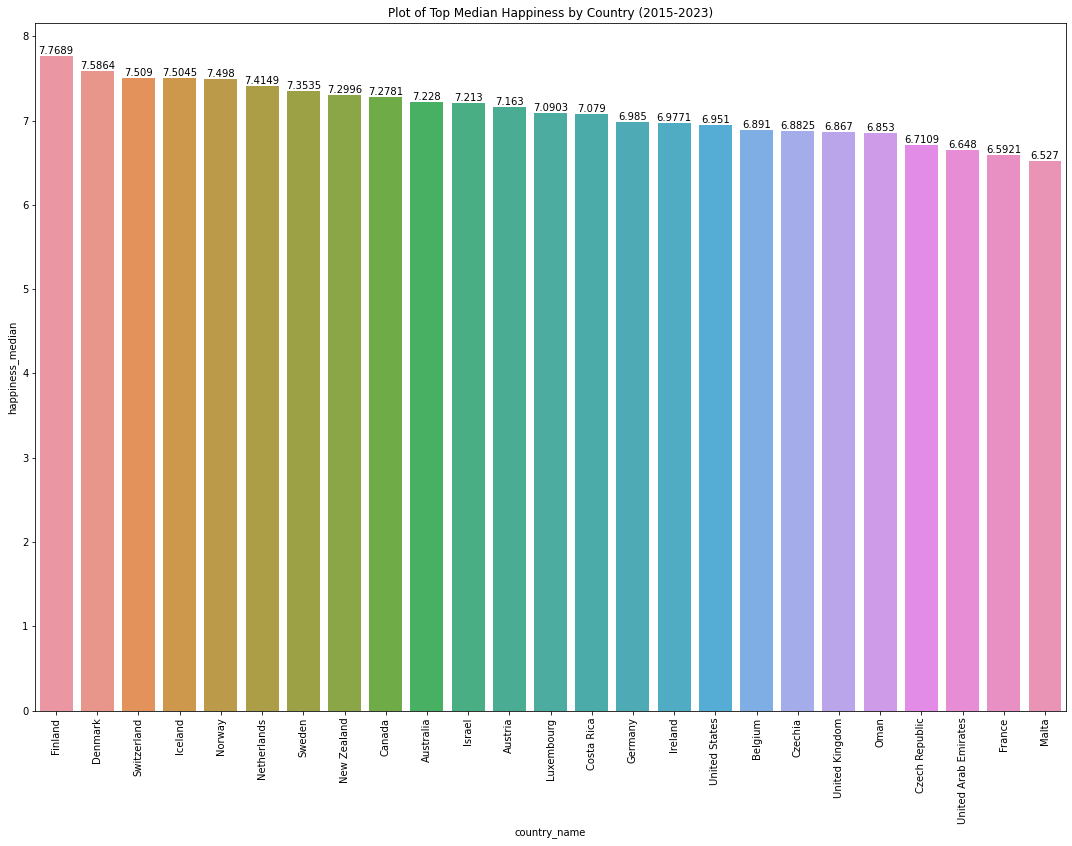

In [62]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
median_order = overall_happiness_df.groupby('country_name')['happiness_median'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_median', data = overall_happiness_df,
            order = median_order.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Top Median Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

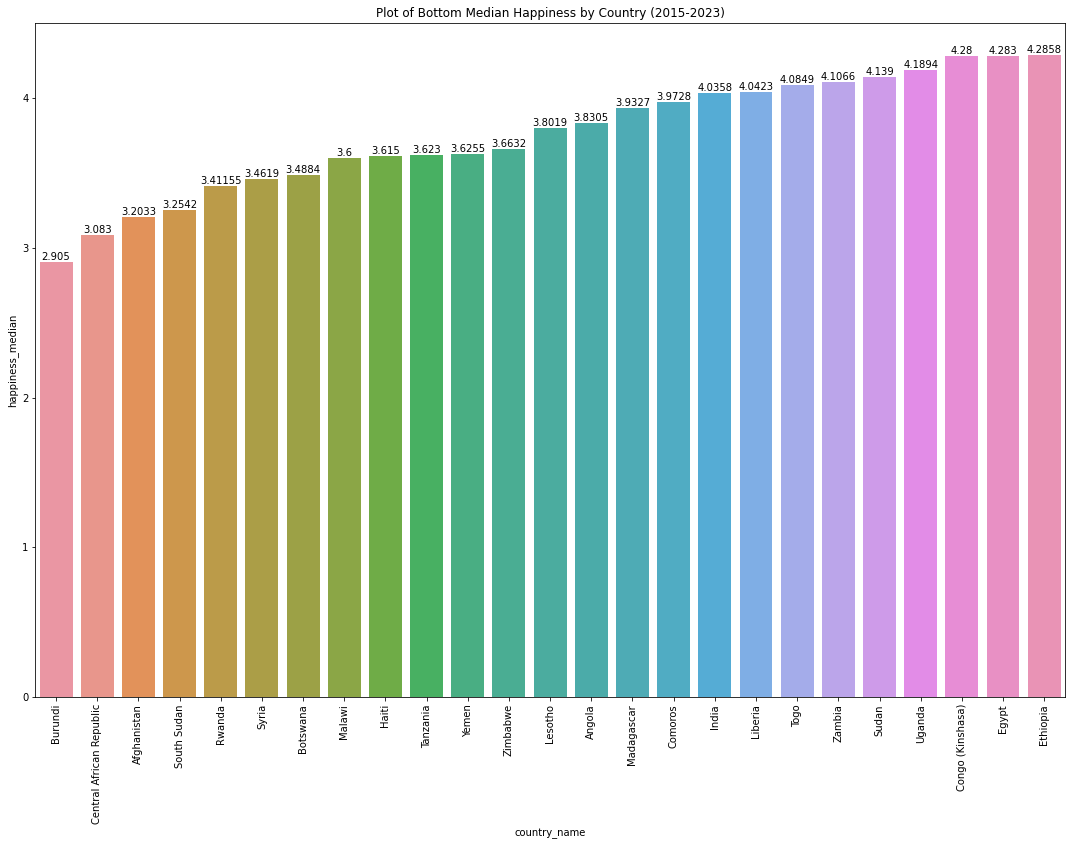

In [63]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
median_order1 = overall_happiness_df.groupby('country_name')['happiness_median'].mean().sort_values(ascending = True)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_median', data = overall_happiness_df,
            order = median_order1.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Bottom Median Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

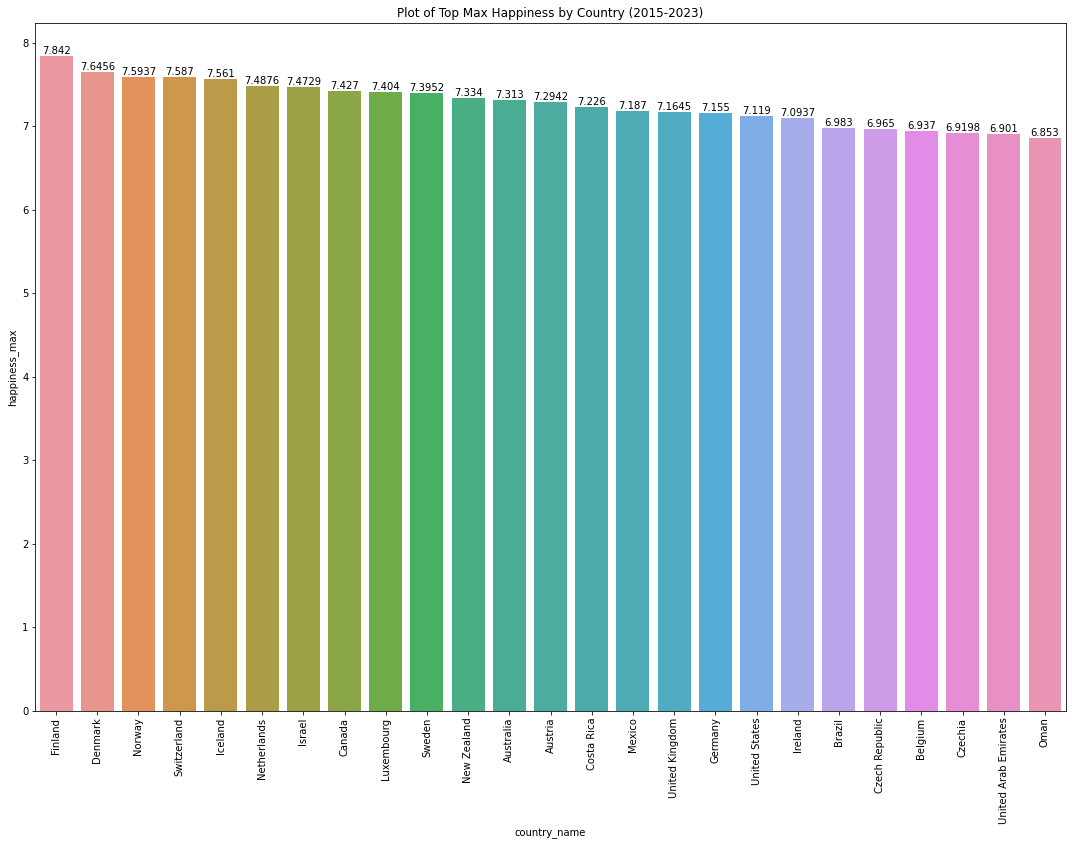

In [64]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
max_order = overall_happiness_df.groupby('country_name')['happiness_max'].max().sort_values(ascending = False)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_max', data = overall_happiness_df,
            order = max_order.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Top Max Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

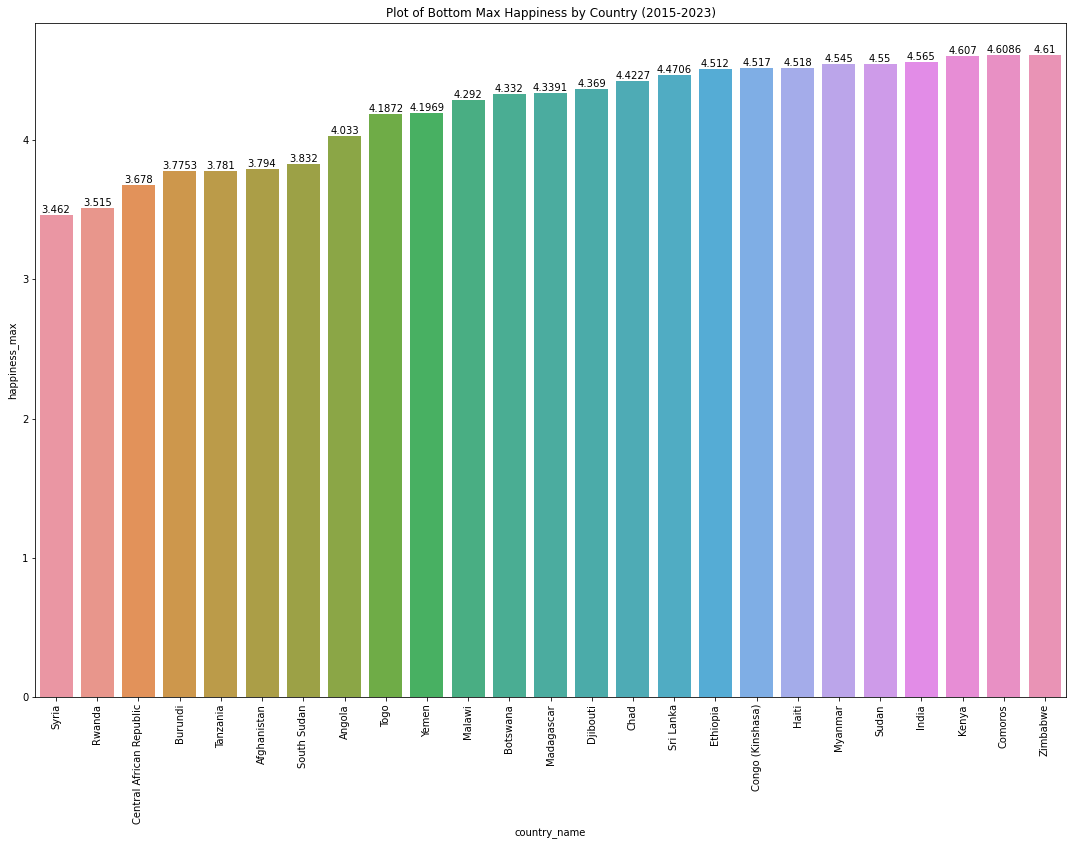

In [65]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
max_order1 = overall_happiness_df.groupby('country_name')['happiness_max'].max().sort_values(ascending = True)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_max', data = overall_happiness_df,
            order = max_order1.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Bottom Max Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

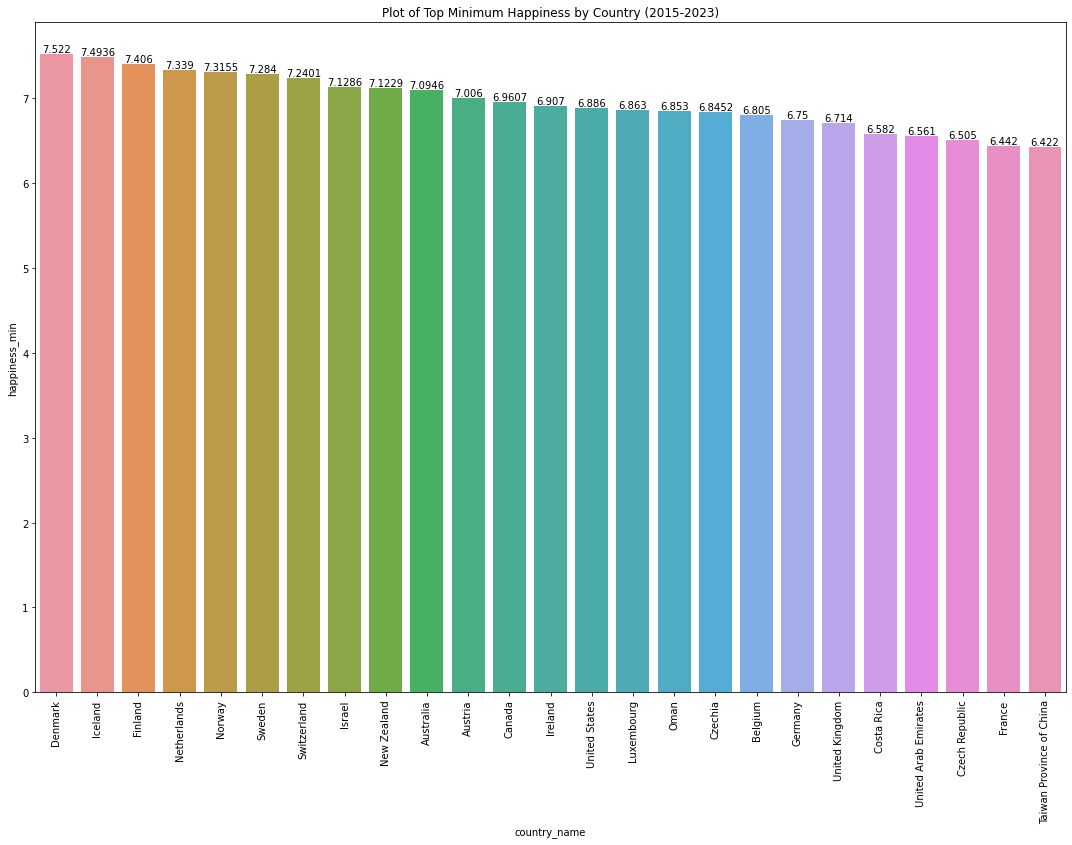

In [66]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
min_order = overall_happiness_df.groupby('country_name')['happiness_min'].max().sort_values(ascending = False)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_min', data = overall_happiness_df,
            order = min_order.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Top Minimum Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

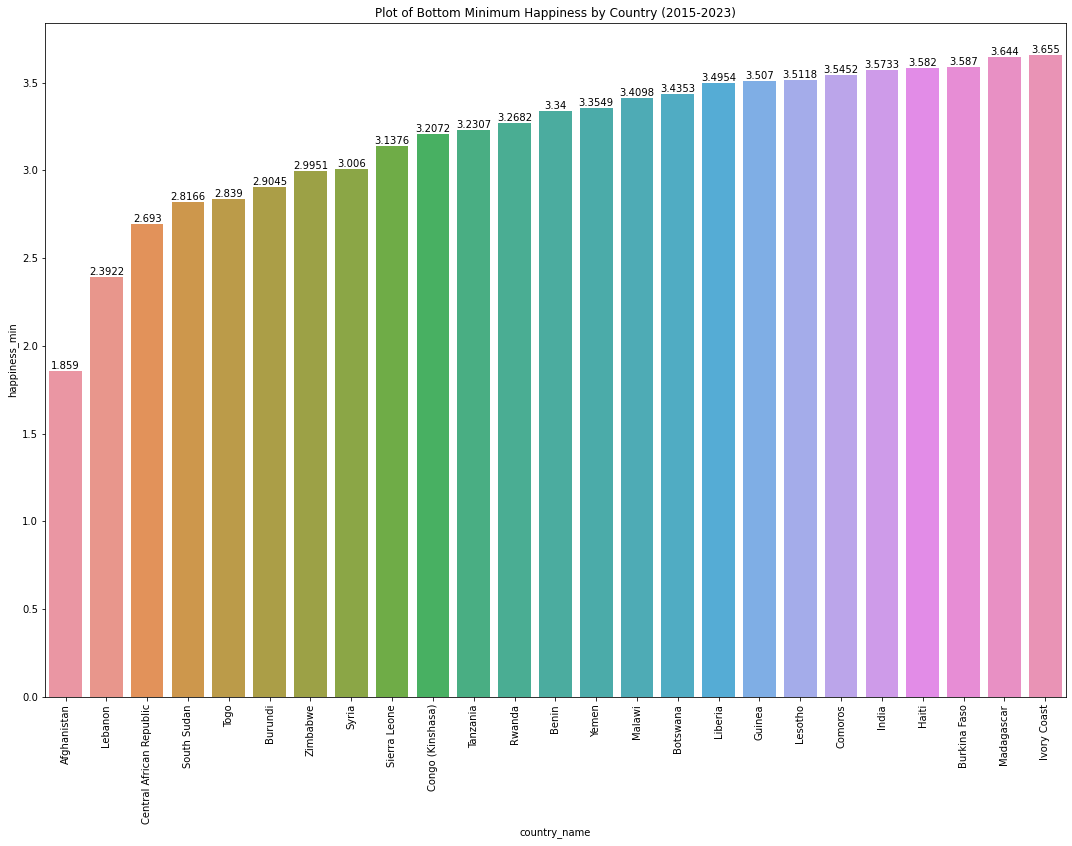

In [67]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
min_order1 = overall_happiness_df.groupby('country_name')['happiness_min'].max().sort_values(ascending = True)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_min', data = overall_happiness_df,
            order = min_order1.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Bottom Minimum Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

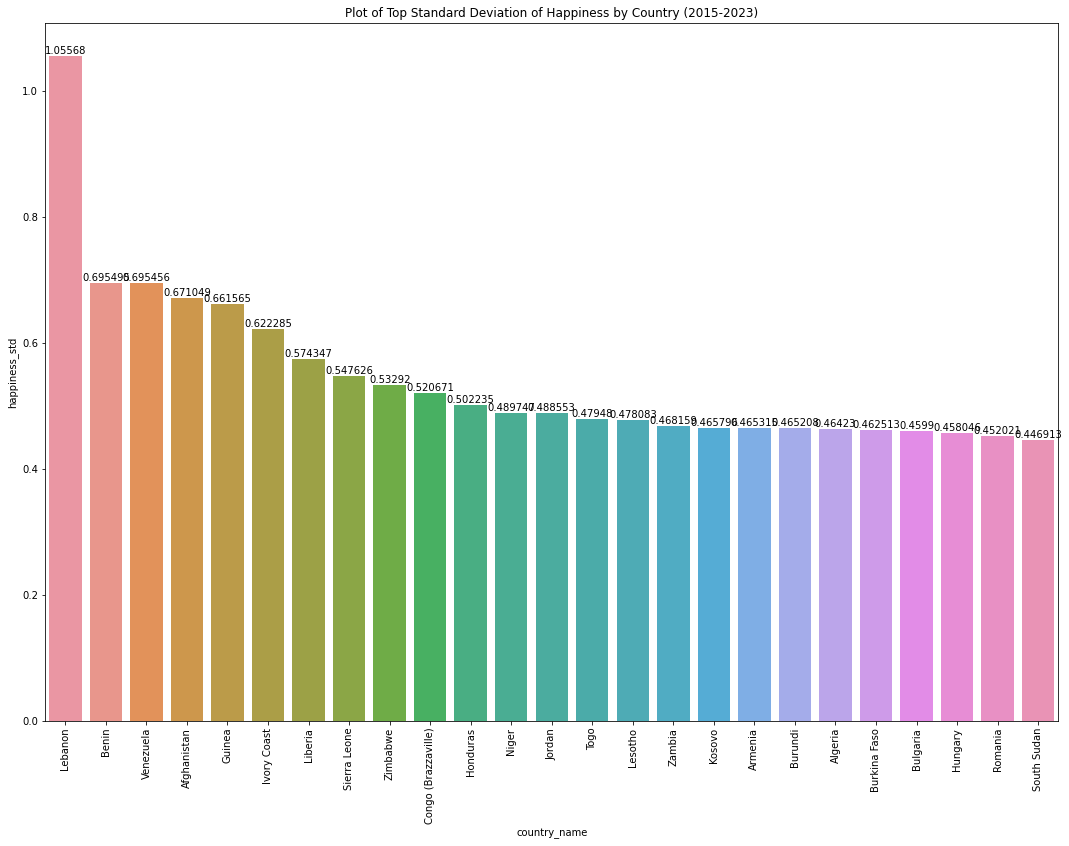

In [68]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
std_order = overall_happiness_df.groupby('country_name')['happiness_std'].max().sort_values(ascending = False)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_std', data = overall_happiness_df,
            order = std_order.iloc[:25].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Top Standard Deviation of Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

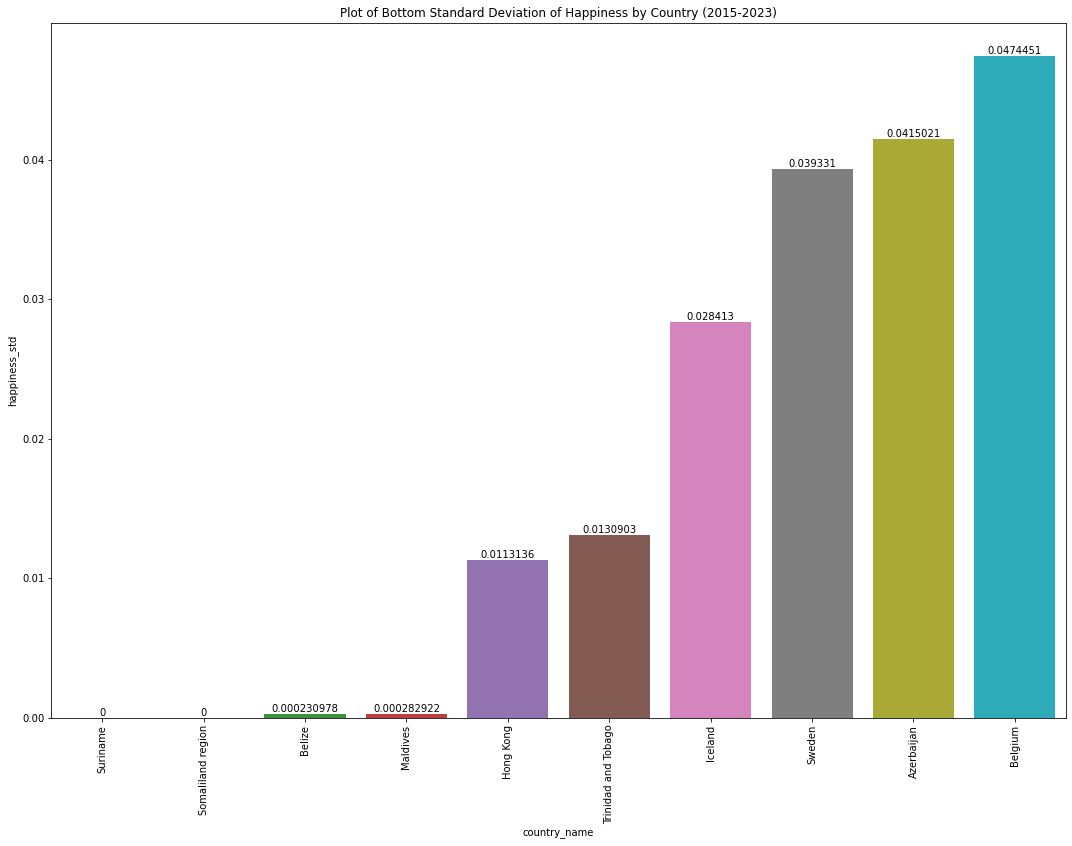

In [69]:
'''
From 2015-2023, plot the descriptive statistics (mean, median, max, min, std) by country.
'''
std_order1 = overall_happiness_df.groupby('country_name')['happiness_std'].max().sort_values(ascending = True)

fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.barplot(x = overall_happiness_df.index, y = 'happiness_std', data = overall_happiness_df,
            order = std_order1.iloc[:10].index)
for label in ax.containers:
        ax.bar_label(label)
plt.title('Plot of Bottom Standard Deviation of Happiness by Country (2015-2023)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

### Highlights for More Exploratory Data Analysis (EDA):
<ul>
    <li> Median Happiness Scores across all countries tended to increase each year. 
    <li> Happiness Classification created based on unhappy (less than 1st Quartile), fairly unahppy (between 1st Quartile and 2nd Quartile), fairly happy (between 2nd Quartile and 3rd Quartile), and happy (greater than 3rd Quartile). Quartiles were based from all 9 years of Happiness Scores for all countries.
    <li> Pairplot of Happiness Classification hue helps show correlations with respect to a country's general happiness category. 
    <li> Countries classified as happy had higher GDP per Capita values compared to unhappy countries.
    <li> Countries classified as happy had higher Social Support values compared to unhappy countries.
    <li> Countries classified as happy had higher Healthy Life Expectancy values compared to unhappy countries.
    <li> Countries classified as happy had higher Freedom of Choice values compared to unhappy countries.
    <li> Countries classified as happy had lower Perception of Corruption values compared to unhappy countries.
    <li> Countries classified as happy had similar Generosity scores compared to unhappy countries.
    <li> Happiest countries based on Mean Happiness score from 2015-2023 were Finland, Denmark, Iceland, Switzerland and Norway.
    <li> Unhappiest countries based on Mean Happiness score from 2015-2023 were Afghanistan, Centreal African Republic, South Sudan, Burundi, and Syria.
    <li> Lebanon had the highest standard deviation in Happiness Score out of all countries.
<ul>

## 3) Data Preparation

### Regression Data Preparation

In [70]:
'''
Create df_reg.
'''
df_reg = df[['happiness_score', 'year', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 
             'corruption_perception', 'dytopia_and_residual']]

In [71]:
df_reg.shape

(1362, 9)

In [72]:
df_reg.head()

happiness_score  year  gdp_per_capita  social_support  life_expectancy  \
0           7.8042  2023       10.792010        0.968770        71.149994   
1           7.5864  2023       10.962164        0.954112        71.250145   
2           7.5296  2023       10.895531        0.982533        72.050018   
3           7.4729  2023       10.638705        0.943344        72.697205   
4           7.4030  2023       10.942279        0.930499        71.550018   

   freedom_choices  generosity  corruption_perception  dytopia_and_residual  
0         0.961408   -0.018824               0.181745              2.363241  
1         0.933533    0.134242               0.195814              2.083766  
2         0.936349    0.210987               0.667848              2.250382  
3         0.808866   -0.023080               0.708094              2.691290  
4         0.886875    0.212686               0.378929              2.110044

In [73]:
'''
Prior to performing any additional data preparation tasks, the data will be split into
a training and test set. Start by defining the features and target variables as X and y, respectively.
The target variable will be price and the remaining columns will be the initial features. 
'''
X = df_reg.drop('happiness_score', axis = 1)
y = df_reg['happiness_score']

In [74]:
'''
Utilize the train_test_split() function to split data into a training and test data set.
I'll be splitting the entire data set into 80% Training and 20% Test.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [75]:
'''
Understand/Verify the shape of the training and test data sets just created.
'''
print("The X_train shape is {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))
print("The y_train shape is {} rows.".format(y_train.shape[0]))
print("The X_test shape is {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))
print("The y_test shape is {} rows.".format(y_test.shape[0]))

The X_train shape is 1089 rows and 8 columns.
The y_train shape is 1089 rows.
The X_test shape is 273 rows and 8 columns.
The y_test shape is 273 rows.


In [76]:
'''
View the first 5 rows of the x_sales_train data set.
'''
X_train.head()

year  gdp_per_capita  social_support  life_expectancy  freedom_choices  \
1296  2015       10.131914        0.865036        70.343193         0.804583   
397   2021        7.158000        0.744000        54.706000         0.882000   
1252  2015        8.514753        0.949333        60.316898         0.940742   
54    2023       10.169086        0.798608        65.662338         0.876728   
1105  2016       10.094557        0.927811        63.799999         0.782806   

      generosity  corruption_perception  dytopia_and_residual  
1296   -0.121989               0.948617              1.264621  
397     0.061000               0.684000              2.783000  
1252   -0.006184               0.477874              2.237410  
54      0.159587               0.758469              1.804088  
1105   -0.039770               0.702017              2.493253

In [77]:
'''
View the first 5 rows of the x_sales_test data set. These should match.
'''
X_test.head()

year  gdp_per_capita  social_support  life_expectancy  freedom_choices  \
51    2023        9.958788        0.890890        67.200081         0.822678   
1107  2016       10.146070        0.910927        63.075001         0.713606   
1319  2015        9.025622        0.891627        63.069744         0.554643   
517   2020        7.674320        0.468671        54.312466         0.735183   
1257  2015       10.634261        0.897270        65.716805         0.747879   

      generosity  corruption_perception  dytopia_and_residual  
51     -0.089480               0.814013              1.861257  
1107   -0.184786               0.925463              2.591155  
1319   -0.102233               0.918812              1.571399  
517    -0.003537               0.740533              3.440810  
1257   -0.075722               0.481451              1.737969

### Highlights for Data Preparation:
<ul>
    <li> Features retained for model training were: 'year', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 'corruption_perception', 'dytopia_and_residual'
    <li> Target feature: Happiness Score
    <li> Data was split into 80% Train, 20% Test subsets.
<ul>

## 4) Predictive Modeling

### Linear Regression

In [78]:
'''
Create a Linear Regression Model.
Fit the model to the training data sets.
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
model_lr_prediction_train = model_lr.predict(X_train)

In [79]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
lr_mae = mean_absolute_error(y_test, model_lr_prediction)
lr_mse = mean_squared_error(y_test, model_lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, model_lr_prediction)
lr_r2_train = r2_score(y_train, model_lr_prediction_train)
print("MAE of the Linear Regression Model is:", round(lr_mae,4))
print("MSE of the Linear Regression Model is:", round(lr_mse,4))
print("RMSE of the Linear Regression Model is:", round(lr_rmse,4))
print("R2 Score of the Linear Regression Model on Test Data is:", round(lr_r2,4))
print("R2 Score of the Linear Regression Model on Train Data is:", round(lr_r2_train,4))

MAE of the Linear Regression Model is: 0.2133
MSE of the Linear Regression Model is: 0.1075
RMSE of the Linear Regression Model is: 0.3279
R2 Score of the Linear Regression Model on Test Data is: 0.9182
R2 Score of the Linear Regression Model on Train Data is: 0.895


### Lasso Regression

In [80]:
'''
Create a Lasso Regression Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_lasso_prediction = model_lasso.predict(X_test)
model_lasso_prediction_train = model_lasso.predict(X_train)

In [81]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
lasso_mae = mean_absolute_error(y_test, model_lasso_prediction)
lasso_mse = mean_squared_error(y_test, model_lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, model_lasso_prediction)
lasso_r2_train = r2_score(y_train, model_lasso_prediction_train)
print("MAE of the Lasso Regression Model is:", round(lasso_mae,4))
print("MSE of the Lasso Regression Model is:", round(lasso_mse,4))
print("RMSE of the Lasso Regression Model is:", round(lasso_rmse,4))
print("R2 Score of the Lasso Regression Model on Test Data is:", round(lasso_r2,4))
print("R2 Score of the Lasso Regression Model on Train Data is:", round(lasso_r2_train,4))

MAE of the Lasso Regression Model is: 0.7103
MSE of the Lasso Regression Model is: 0.8263
RMSE of the Lasso Regression Model is: 0.909
R2 Score of the Lasso Regression Model on Test Data is: 0.3711
R2 Score of the Lasso Regression Model on Train Data is: 0.3062


### Decision Tree Regressor

In [82]:
'''
Create a Decision Tree Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
model_dt_prediction_train = model_dt.predict(X_train)

In [83]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
dt_mae = mean_absolute_error(y_test, model_dt_prediction)
dt_mse = mean_squared_error(y_test, model_dt_prediction)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, model_dt_prediction)
dt_r2_train = r2_score(y_train, model_dt_prediction_train)
print("MAE of the Decision Tree Model is:", round(dt_mae,4))
print("MSE of the Decision Tree Model is:", round(dt_mse,4))
print("RMSE of the Decision Tree Model is:", round(dt_rmse,4))
print("R2 Score of the Decision Tree Model on Test Data is:", round(dt_r2,4))
print("R2 Score of the Decision Tree Model on Train Data is:", round(dt_r2_train,4))

MAE of the Decision Tree Model is: 0.2715
MSE of the Decision Tree Model is: 0.1441
RMSE of the Decision Tree Model is: 0.3796
R2 Score of the Decision Tree Model on Test Data is: 0.8904
R2 Score of the Decision Tree Model on Train Data is: 1.0


### Random Forest Regressor

In [84]:
'''
Create a Random Forest Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
model_rf_prediction_train = model_rf.predict(X_train)

In [85]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
rf_mae = mean_absolute_error(y_test, model_rf_prediction)
rf_mse = mean_squared_error(y_test, model_rf_prediction)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, model_rf_prediction)
rf_r2_train = r2_score(y_train, model_rf_prediction_train)
print("MAE of the Random Forest Model is:", round(rf_mae,4))
print("MSE of the Random Forest Model is:", round(rf_mse,4))
print("RMSE of the Random Forest Model is:", round(rf_rmse,4))
print("R2 Score of the Random Forest Model on Test Data is:", round(rf_r2,4))
print("R2 Score of the Random Forest Model on Train Data is:", round(rf_r2_train,4))

MAE of the Random Forest Model is: 0.1938
MSE of the Random Forest Model is: 0.0686
RMSE of the Random Forest Model is: 0.2619
R2 Score of the Random Forest Model on Test Data is: 0.9478
R2 Score of the Random Forest Model on Train Data is: 0.9921


### Highlights for Predictive Modeling:
<ul>
    <li> Chose to train and test four models: Linear Regression, Lasso Regression, Decision Tree, and Random Forest.
    <li> Evaluation Metrics captured were R2 Test, R2, Train, MAE, RMSE, and MSE.
<ul>

## 5) Evaluation

In [86]:
'''
Create a dictionary summarizing the evaluation criteria for the four models.
'''
summary_data_sales = OrderedDict([('MAE', [lr_mae, lasso_mae, dt_mae, rf_mae]),
                           ('MSE', [lr_mse, lasso_mse, dt_mse, rf_mse]),
                           ('RMSE', [lr_rmse, lasso_rmse, dt_rmse, rf_rmse]),
                           ('R2_Score_Train', [lr_r2_train, lasso_r2_train, dt_r2_train, rf_r2_train]),
                           ('R2_Score_Test', [lr_r2, lasso_r2, dt_r2, rf_r2]),
                           ('Model', ['LinearRegression','Lasso', 'DecisionTree','RandomForest']),])

In [87]:
'''
Display the summary evaluation metrics for the four models in a pandas dataframe.
'''
summary_df_sales = pd.DataFrame(summary_data_sales, index = summary_data_sales['Model'])

In [88]:
'''
Sort the values based on the highest R-Squared Score on the test data.
'''
summary_df_sales.sort_values(by = "R2_Score_Test", ascending = False)

MAE       MSE      RMSE  R2_Score_Train  R2_Score_Test  \
RandomForest      0.193754  0.068597  0.261910        0.992132       0.947794   
LinearRegression  0.213325  0.107522  0.327906        0.894965       0.918169   
DecisionTree      0.271491  0.144061  0.379554        1.000000       0.890361   
Lasso             0.710284  0.826333  0.909029        0.306213       0.371113   

                             Model  
RandomForest          RandomForest  
LinearRegression  LinearRegression  
DecisionTree          DecisionTree  
Lasso                        Lasso

### Highlights for Evaluation:
<ul>
    <li> R-squared value on Test data for Random Forest (94.5%) and Linear Regression (91.8%) performed the best. 
    <li> Random Forest and Decision Tree models are suspects for overfitting to the training data.
    <li> Lasso Regression model performed the worst with an R-squared value on Test data of 37%. 
<ul>

## 6) Deployment Recommendation

Although the Linear Regression model performs slightly worse than the Random Forest model, my recommendation would be to deploy the Linear Regression model. The Random Forest model is subject to overfitting the training data and can be fairly complex to understand. The Linear Regression model provides a simpler alternative and can be monitored for performance over time. 

### Create Results Directory

In [89]:
results_dir = Path('C:/Users/jkmey/Documents/Github/DSC680_Course_Assignments/DSC_680_Applied_Data_Science/Project_2/').joinpath('results')
results_dir.mkdir(parents=True, exist_ok = True)

In [90]:
'''
Save the Random Forest Model.
'''
result_model_file = results_dir.joinpath('World_Happiness_Model.h5')
pickle.dump(model_lr, open(result_model_file, 'wb'))